In [1]:
import random 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.figure
import matplotlib.lines as mlines
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.datasets import make_blobs 
from scipy.spatial import distance_matrix, distance
from scipy.cluster import hierarchy 
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler 
%matplotlib inline

In [2]:
def getData(fileText):
    #Get the data text sorted out
    column1 = []
    column2 = []
    for row in fileText.splitlines():
        if(row[7]!=" "):
            column1.append(row[7:15])
            column2.append(row[23:38])
    column1 = column1[15:450]
    column2 = column2[15:450]
    #Convert to numerical data     
    column1_num = pd.to_numeric(column1)
    column2_num = pd.to_numeric(column2)
    
    return [column1_num, column2_num]

In [12]:
class cluster:
    
    def k_means_cluster(self, X, y):
        mpl.style.use('default')
        np.random.seed(0)
        print(len(X))
        print(len(X[0]))
        X = StandardScaler().fit_transform(X, y)
        k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
        k_means.fit(X, y)
        labels = k_means.labels_
        cluster_centers = k_means.cluster_centers_
        fig = plt.figure(figsize=(6, 4))

        colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))
        
        ax = fig.add_subplot(1, 1, 1)

        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='blue', s=200, alpha=0.5);
        plt.title('K-Means')
        plt.show()

        return labels
    
    def agglom_cluster(self, X, y):
        mpl.style.use('default')
        agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
        agglom.fit(X, y)
        labels = agglom.labels_
        # Create a figure of size 6 inches by 4 inches.
        plt.figure(figsize=(6,4))
        # These two lines of code are used to scale the data points down,
        # Or else the data points will be scattered very far apart.

        # Create a minimum and maximum range of X1.
        x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
        # Get the average distance for X1.
        X = (X - x_min) / (x_max - x_min)
        dist_matrix = distance.pdist(X, metric="jaccard")
        #print(dist_matrix)
        #COSINE/EUCLIDEAN METRIC DID NOT WORK
        Z = hierarchy.linkage(dist_matrix, 'average')
        dendro = hierarchy.dendrogram(Z)
        plt.title('Agglom')
        plt.show()
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
        plt.title('Agglom')
        plt.show()
        return labels
    
    def DBSCAN_cluster(self, X, y):
        mpl.style.use('default')
        X = StandardScaler().fit_transform(X, y)
        epsilon = 0.3
        minimumSamples = 1
        db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X, y)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        unique_labels = set(labels)

        colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = 'k'

            class_member_mask = (labels == k)

            # Plot the datapoints that are clustered
            xy = X[class_member_mask & core_samples_mask]
            plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

            # Plot the outliers
            xy = X[class_member_mask & ~core_samples_mask]
            plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)
            plt.title('DBSCAN')
        return labels
    
    def spectral_cluster(self, X, y):
        mpl.style.use('default')
        X = StandardScaler().fit_transform(X, y)
        clustering = SpectralClustering(n_clusters=4,
        assign_labels="discretize",
        random_state=0).fit(X, y)
        labels =  clustering.labels_
        
        fig = plt.figure(figsize=(6, 4))
        colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
        plt.title('Spectral')
        plt.show()
        #plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='blue', s=200, alpha=0.5);
        
        return labels
    
    

In [13]:
class Graph:
    def each_graph(self):
        mpl.style.use('ggplot')
        path = "/Users/johnrussell/Desktop/XAFS-Data/*.nor"
        files = []
        for file in glob.glob(path):
            #print(file[file.index('XAFS'):]+"\n")
            fileCSV = pd.read_csv(file, skiprows=37)
            fileText = fileCSV.to_string()
            files.append(file[file.index('XAFS')+10:file.index('.nor')])
            column1 = []
            column2 = []
            for row in fileText.splitlines():
                if(row[7]!=" "):
                    column1.append(row[7:15])
                    column2.append(row[23:38])
            #Convert to numerical data     
            column1_num = pd.to_numeric(column1)
            column2_num = pd.to_numeric(column2)
            columns_df = pd.DataFrame(data=np.array([column1_num, column2_num])).transpose()
            columns_df.columns = ['X','Y']
            mpl.style.use('ggplot')
            columns_df.plot(x='X', y='Y', kind='line', figsize=(20,10))
            plt.legend(files)
            del files[0]
    def all_graphs(self):
        mpl.style.use('ggplot')
        path = "/Users/johnrussell/Desktop/XAFS-Data/*.nor"
        fig = plt.figure()
        files = []
        for file in glob.glob(path):
            ax = fig.add_subplot()
            fileCSV = pd.read_csv(file, skiprows=37)
            fileText = fileCSV.to_string()
            files.append(file[file.index('XAFS')+10:file.index('.nor')])
            column1 = []
            column2 = []
            for row in fileText.splitlines():
                if(row[7]!=" "):
                    column1.append(row[7:15])
                    column2.append(row[23:38])
            #Convert to numerical data     
            column1_num = pd.to_numeric(column1)
            column2_num = pd.to_numeric(column2)

            columns_df = pd.DataFrame(data=np.array([column1_num, column2_num])).transpose()
            columns_df.columns = ['X','Y']
            mpl.style.use('ggplot')
            columns_df.plot(x='X', y='Y', kind='line', figsize=(20,10), ax=ax)
            plt.legend(files)
    def cluster_graph(self, cluster_array):
        mpl.style.use('ggplot')
        #cluster_array = np.array([3, 3, 3, 1, 1, 3, 0, 3, 1, 0, 2, 0, 3, 3])
        arrays = []
        filearrs = []
        for i in range(np.max(cluster_array)+1):
            arrays.append([])
            filearrs.append([])
        index = 0
        path = "/Users/johnrussell/Desktop/XAFS-Data/*.nor"
        for file in glob.glob(path):
            fileCSV = pd.read_csv(file, skiprows=37)
            fileText = fileCSV.to_string()
            column1 = []
            column2 = []
            for row in fileText.splitlines():
                if(row[7]!=" "):
                    column1.append(row[7:15])
                    column2.append(row[23:38])
            #Convert to numerical data     
            column1_num = pd.to_numeric(column1)
            column2_num = pd.to_numeric(column2)
            columns_df = pd.DataFrame(data=np.array([column1_num, column2_num])).transpose()
            columns_df.columns = ['X','Y']
            cluster_arr_index = cluster_array[index]
            #print(cluster_arr_index)
            arrays[cluster_arr_index].append(columns_df)
            filearrs[cluster_arr_index].append(file[file.index('XAFS')+10:file.index('.nor')])
            index = index + 1

        figs = []
        fig = plt.figure()
        subplots = []
        #print(len(arrays[3]))
        for i in range(len(arrays)):
            figs.append(plt.figure())
            #subplots.append(fig.add_subplot(2, 2, i+1))
        for i in range(len(arrays)):
            ax = figs[i].add_subplot()
            #print(filearrs[i])
            for figure in arrays[i]:
                mpl.style.use('ggplot')
                #print(figure.index)
                figure.plot(x='X', y='Y', kind='line', figsize=(20,10), xlim=(6400,6800), ylim=(0,2), ax=ax)
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_title('X and Y')
            ax.legend(filearrs[i])

14
435


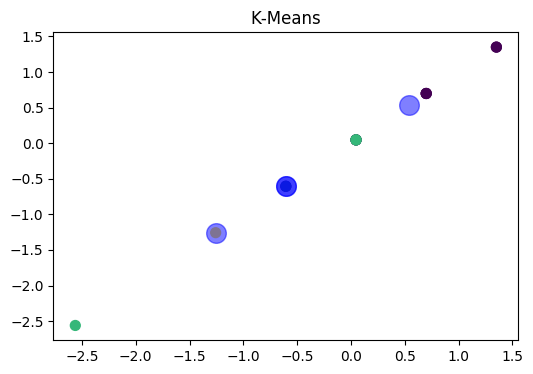

K-Means


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


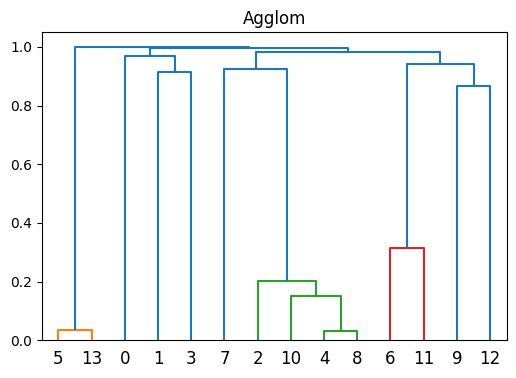

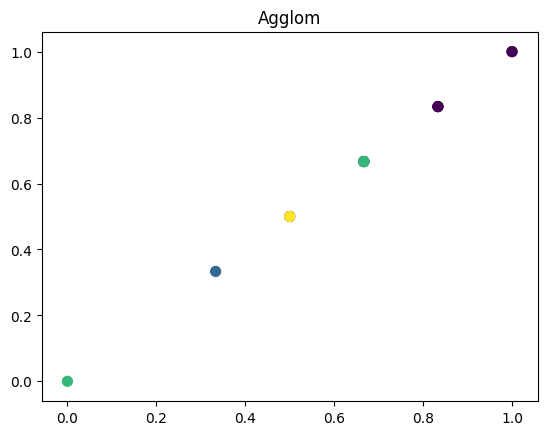

Agglom


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


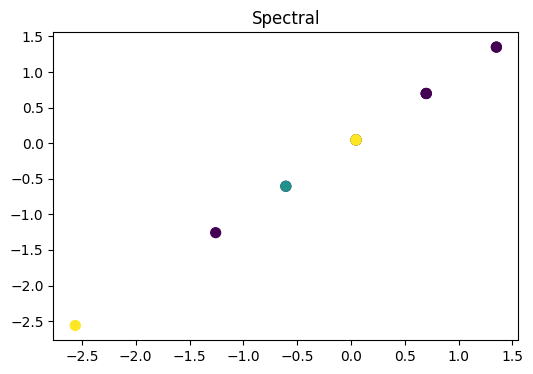

Spectral


In [14]:
path = "/Users/johnrussell/Desktop/XAFS-Data/*.nor"
#datapoints = []
xdata = []
ydata = []
num = 0
for file in glob.glob(path):
    #print(num, file[file.index('XAFS'):]+"\n")
    num = num + 1
    fileCSV = pd.read_csv(file, skiprows=37)
    fileString = fileCSV.to_string()
    xdata.append(getData(fileString)[0])
    ydata.append(getData(fileString)[1])
    
    
#print(alldata)
c = cluster()
k_means_arr = c.k_means_cluster(xdata, ydata)
print('K-Means')
#print(k_means_arr)
#DBSCAN_arr = c.DBSCAN_cluster(xdata, ydata)
#print('DBSCAN')
#print(DBSCAN_arr)
agglom_arr = c.agglom_cluster(xdata, ydata)
print('Agglom')
#print(agglom_arr)
spectral_arr = c.spectral_cluster(xdata, ydata)
print('Spectral')
#print(spectral_arr)

<Figure size 640x480 with 0 Axes>

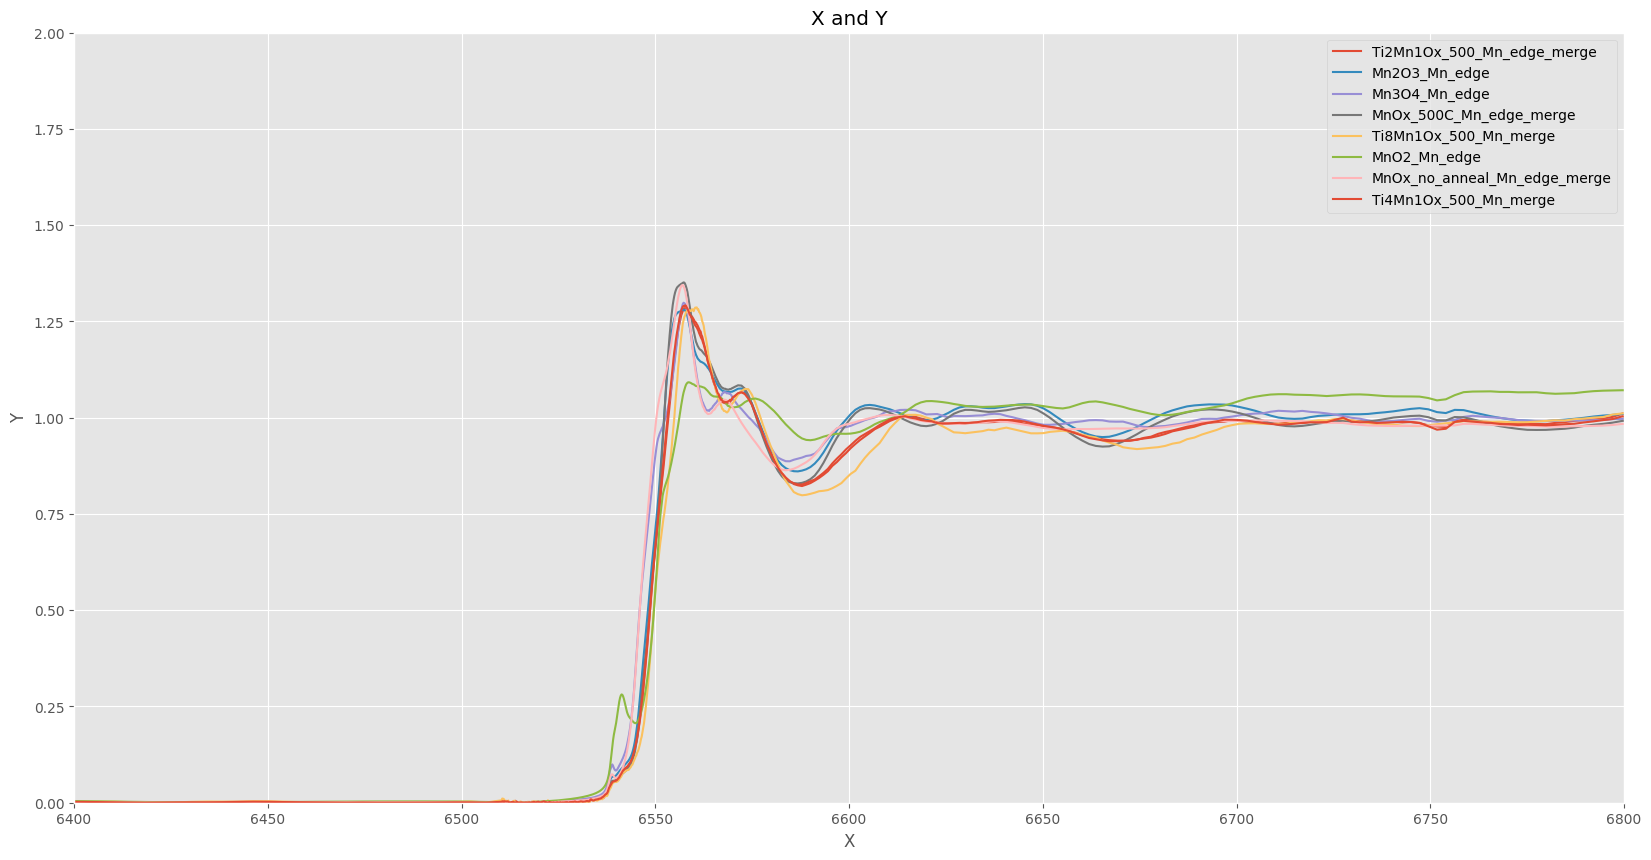

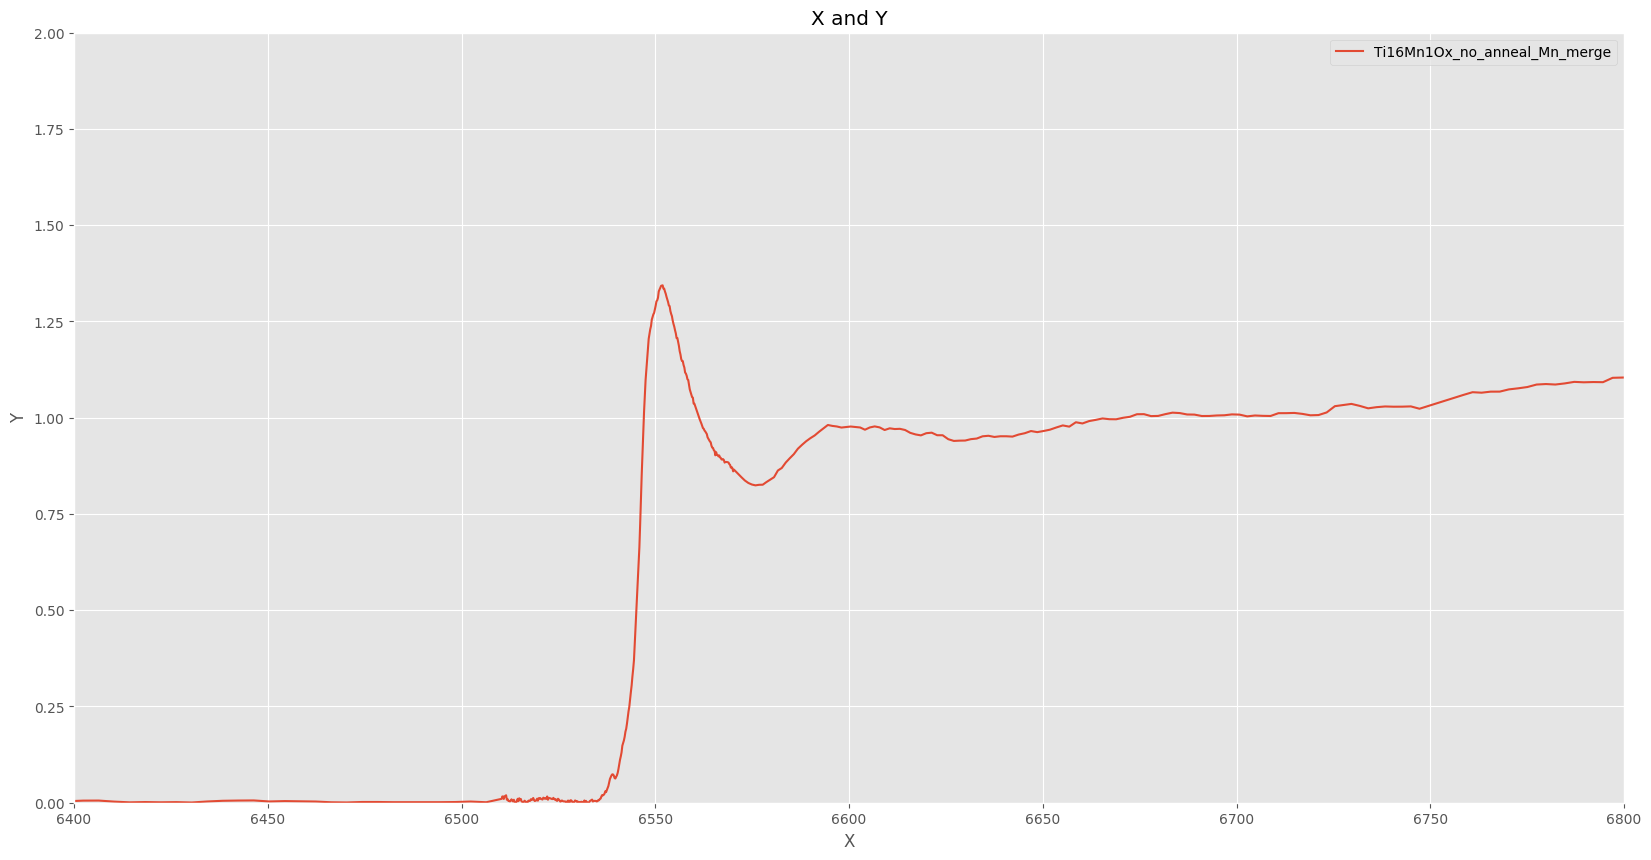

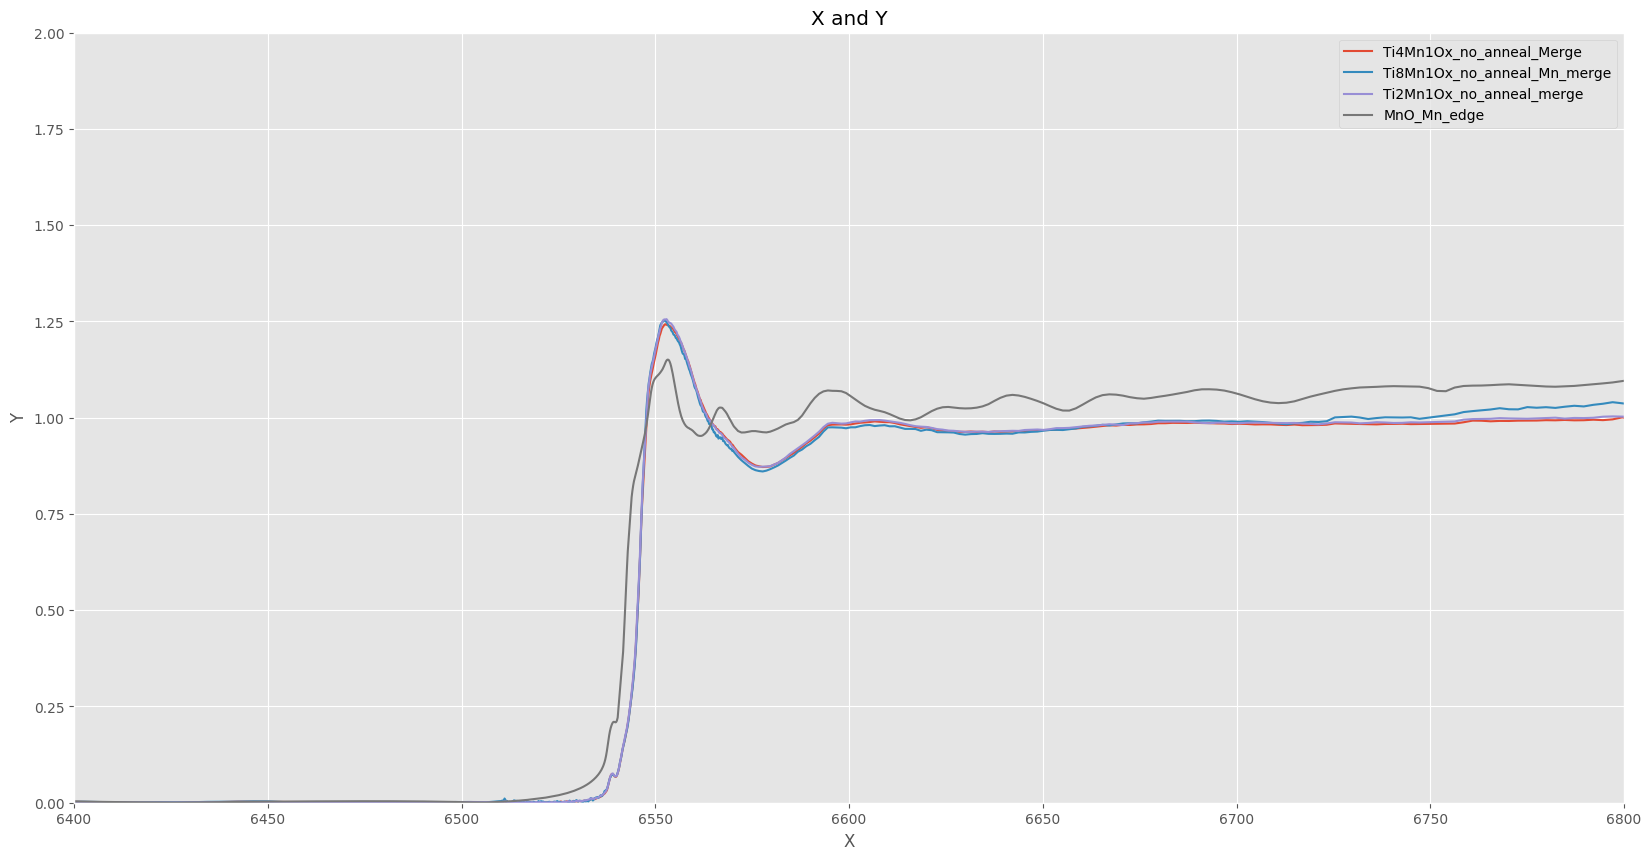

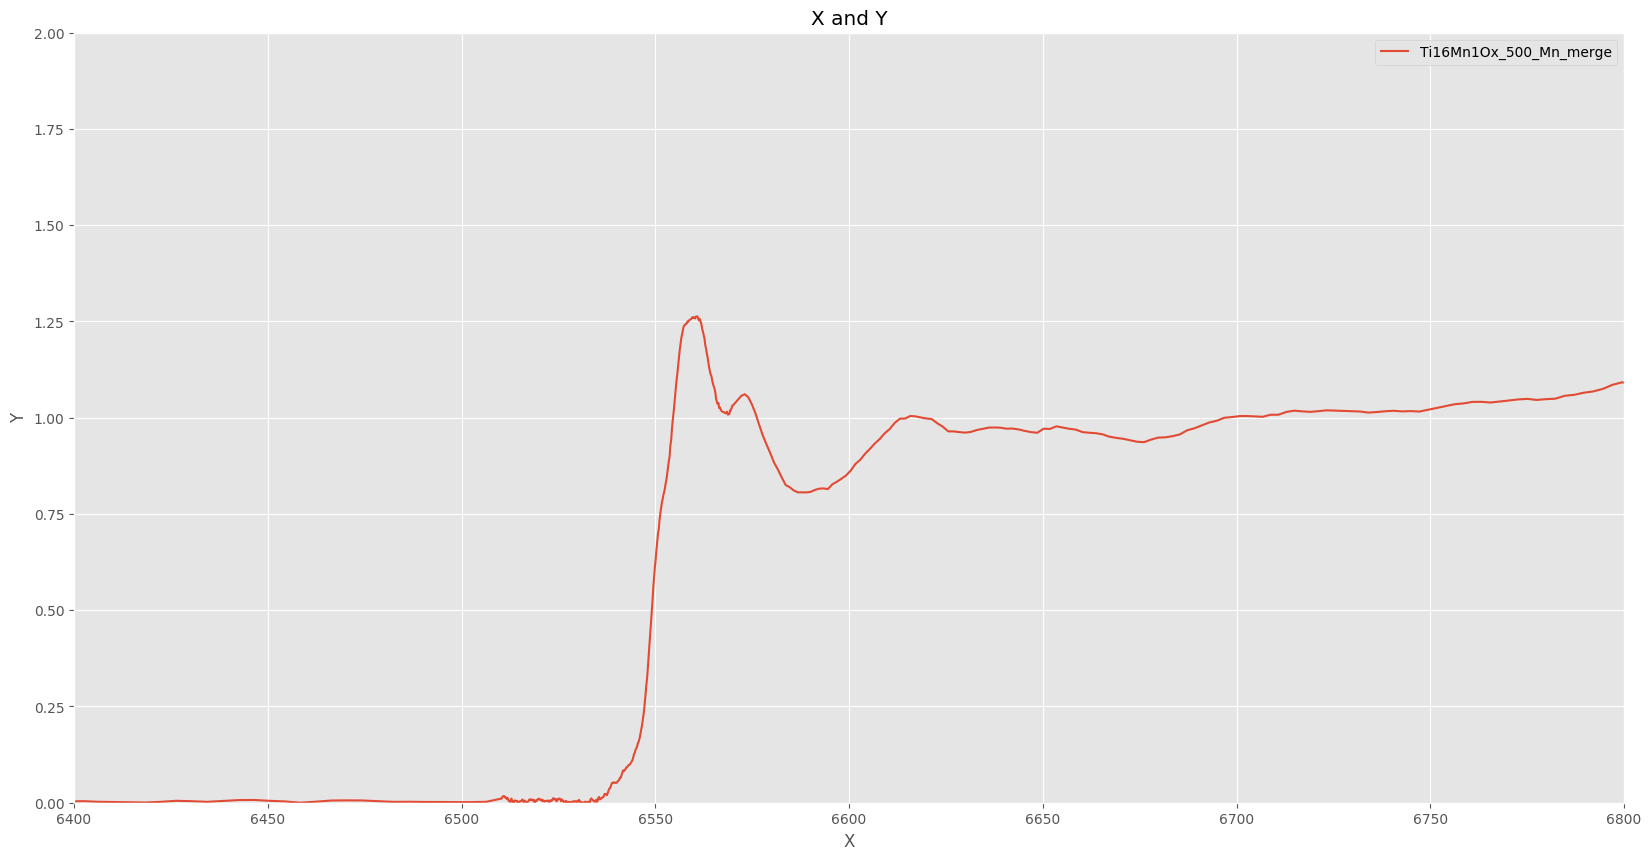

In [26]:
g = Graph()
g.cluster_graph(k_means_arr)

<Figure size 640x480 with 0 Axes>

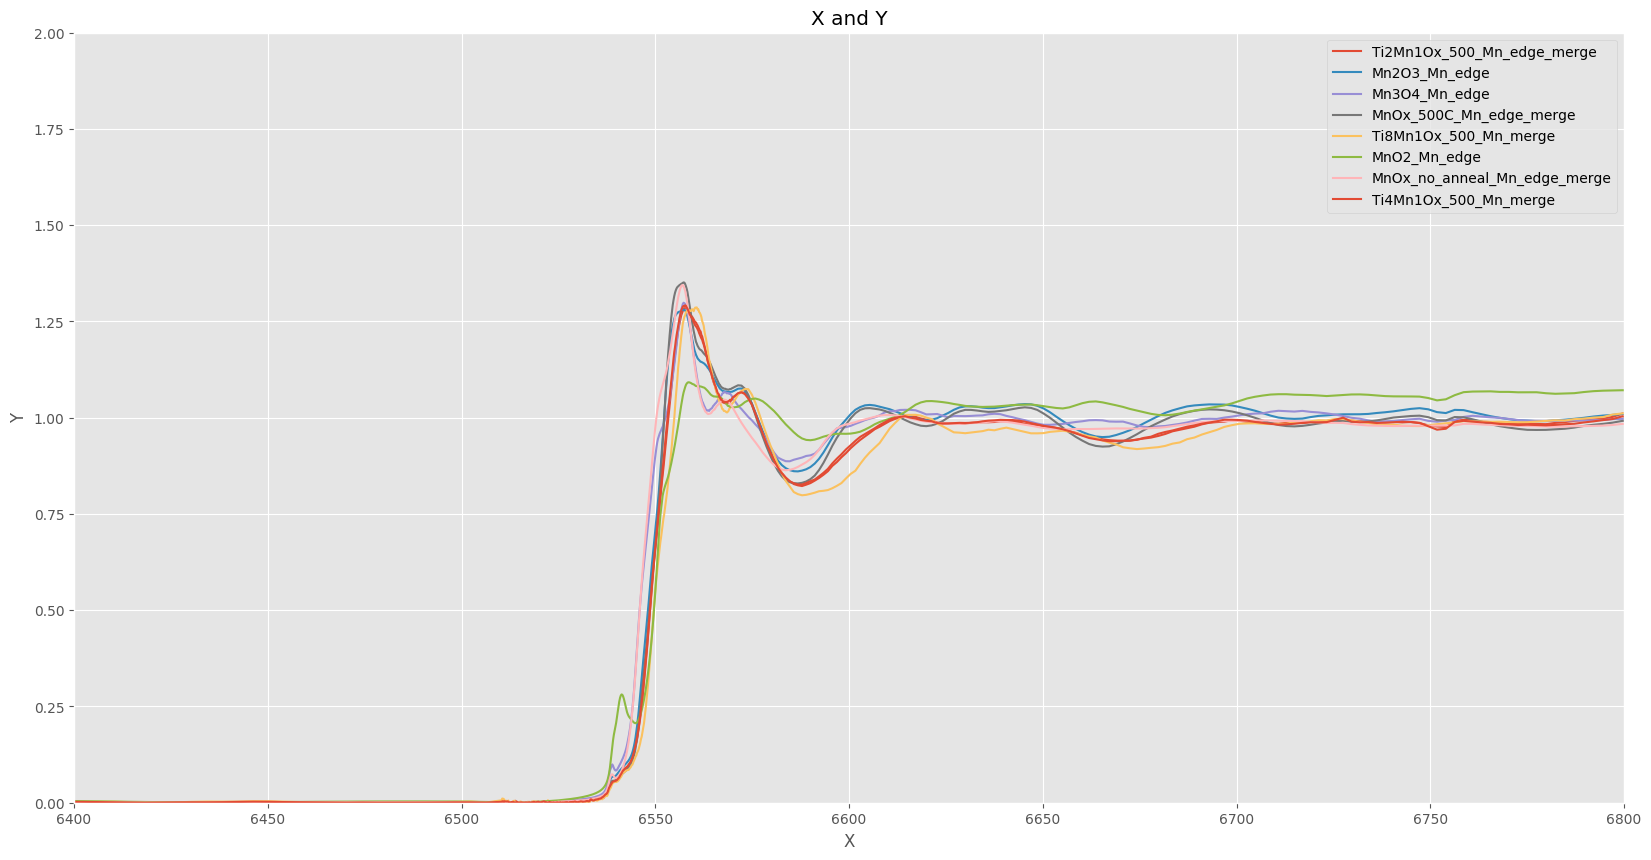

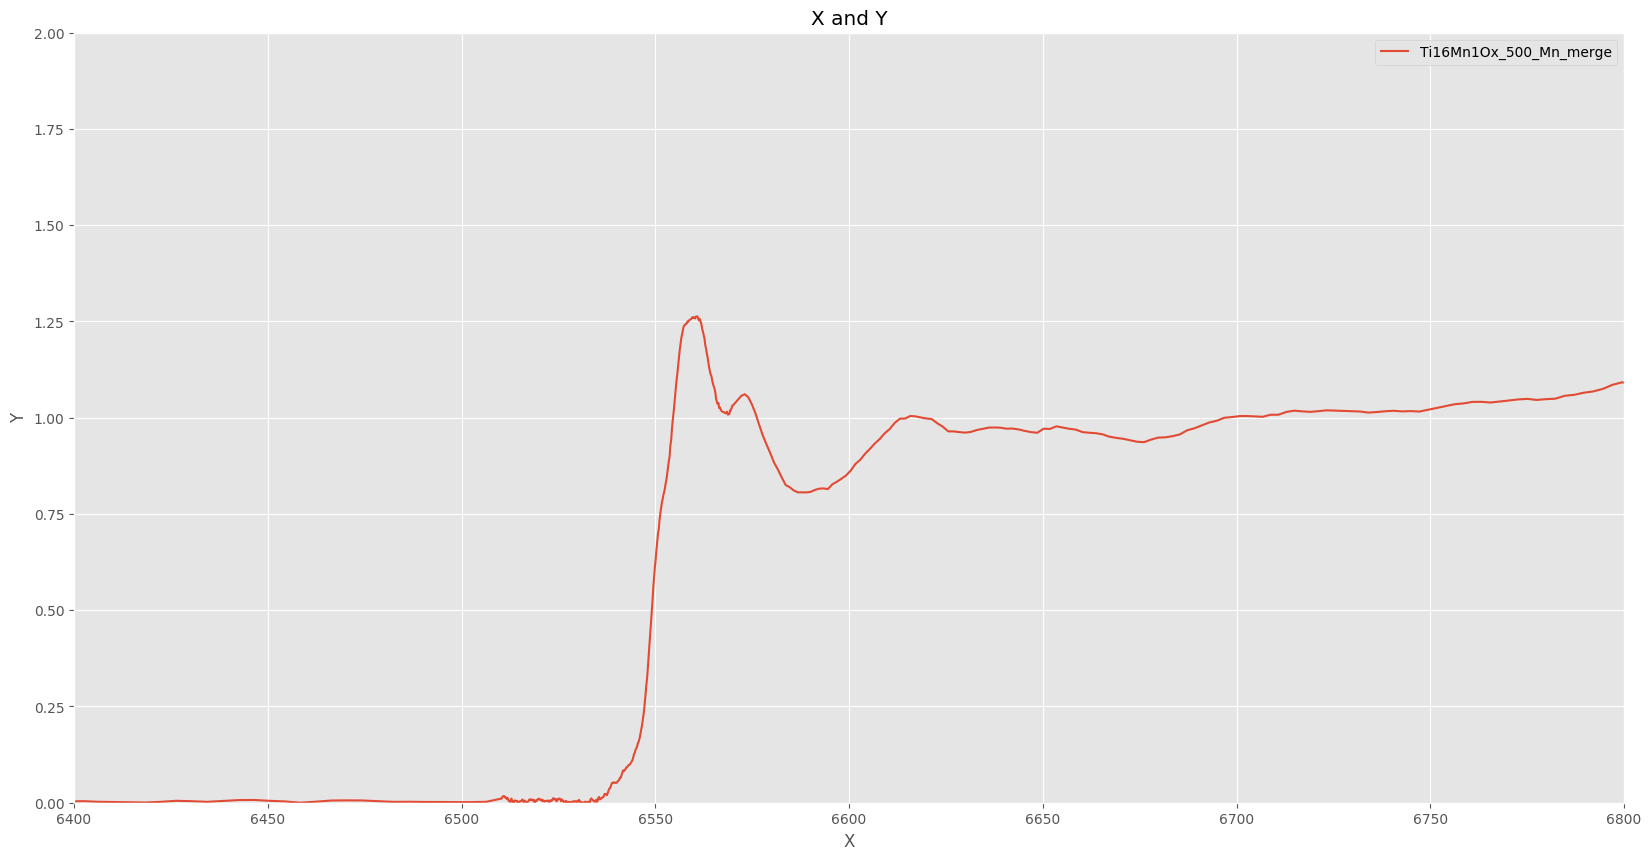

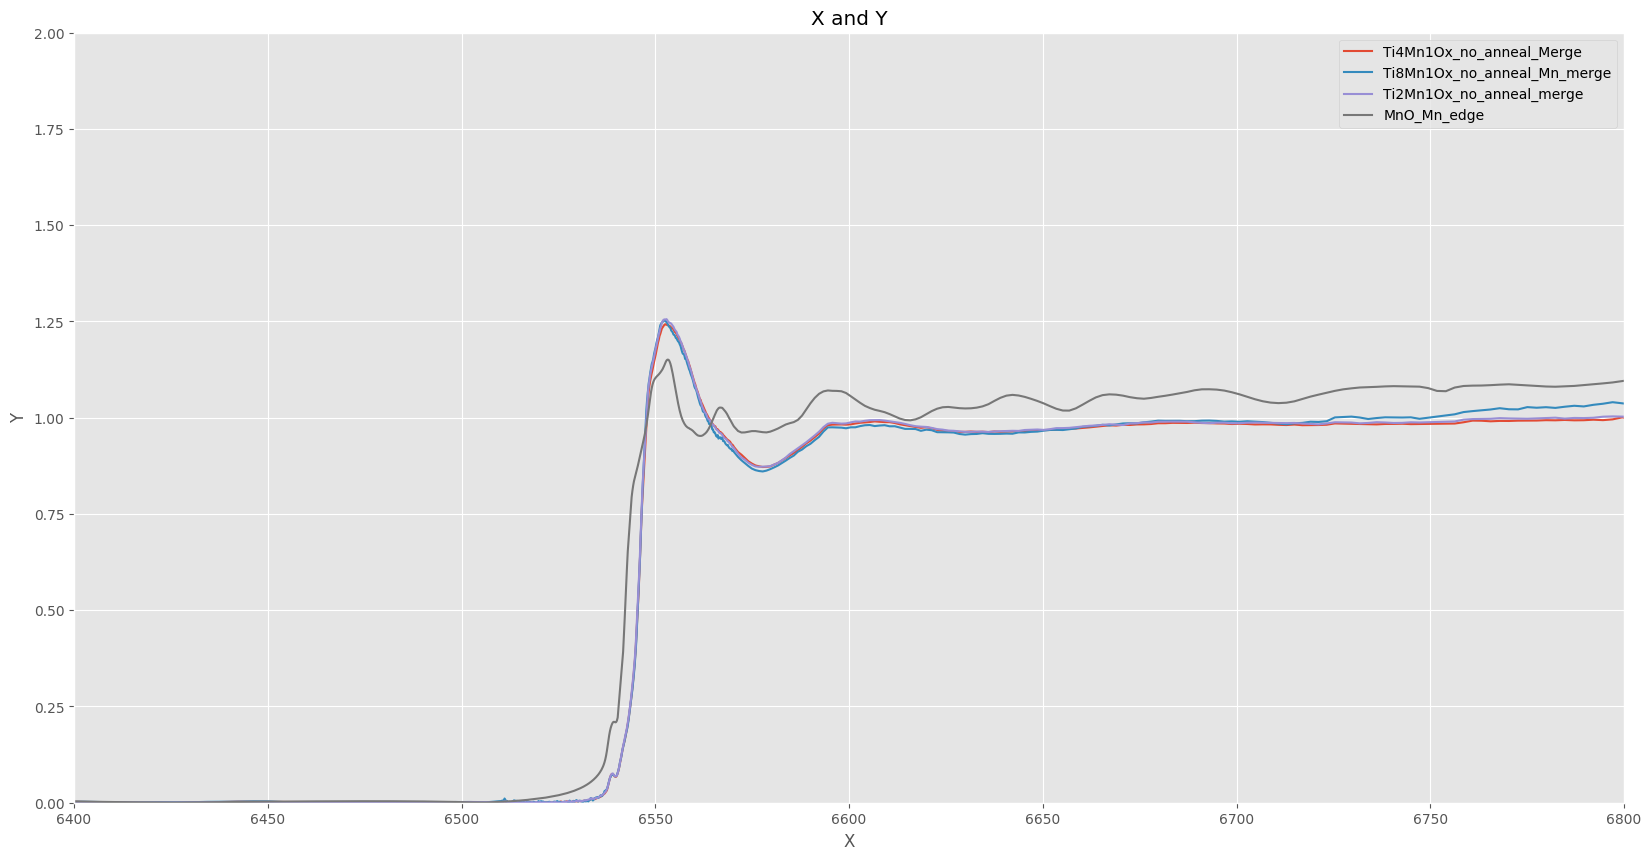

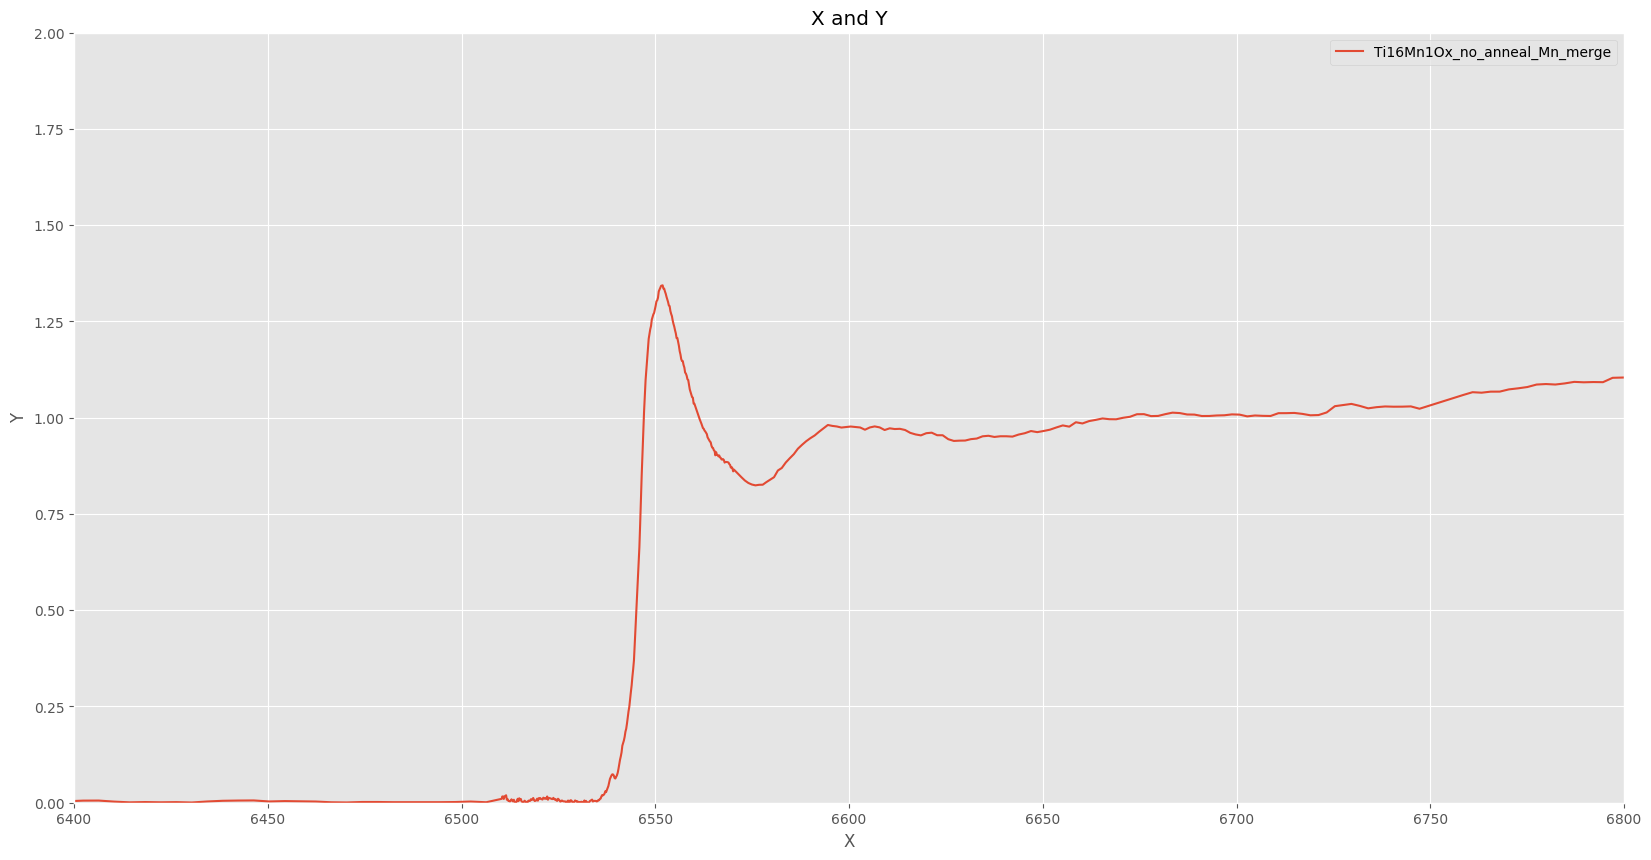

In [27]:
g = Graph()
g.cluster_graph(agglom_arr)

<Figure size 640x480 with 0 Axes>

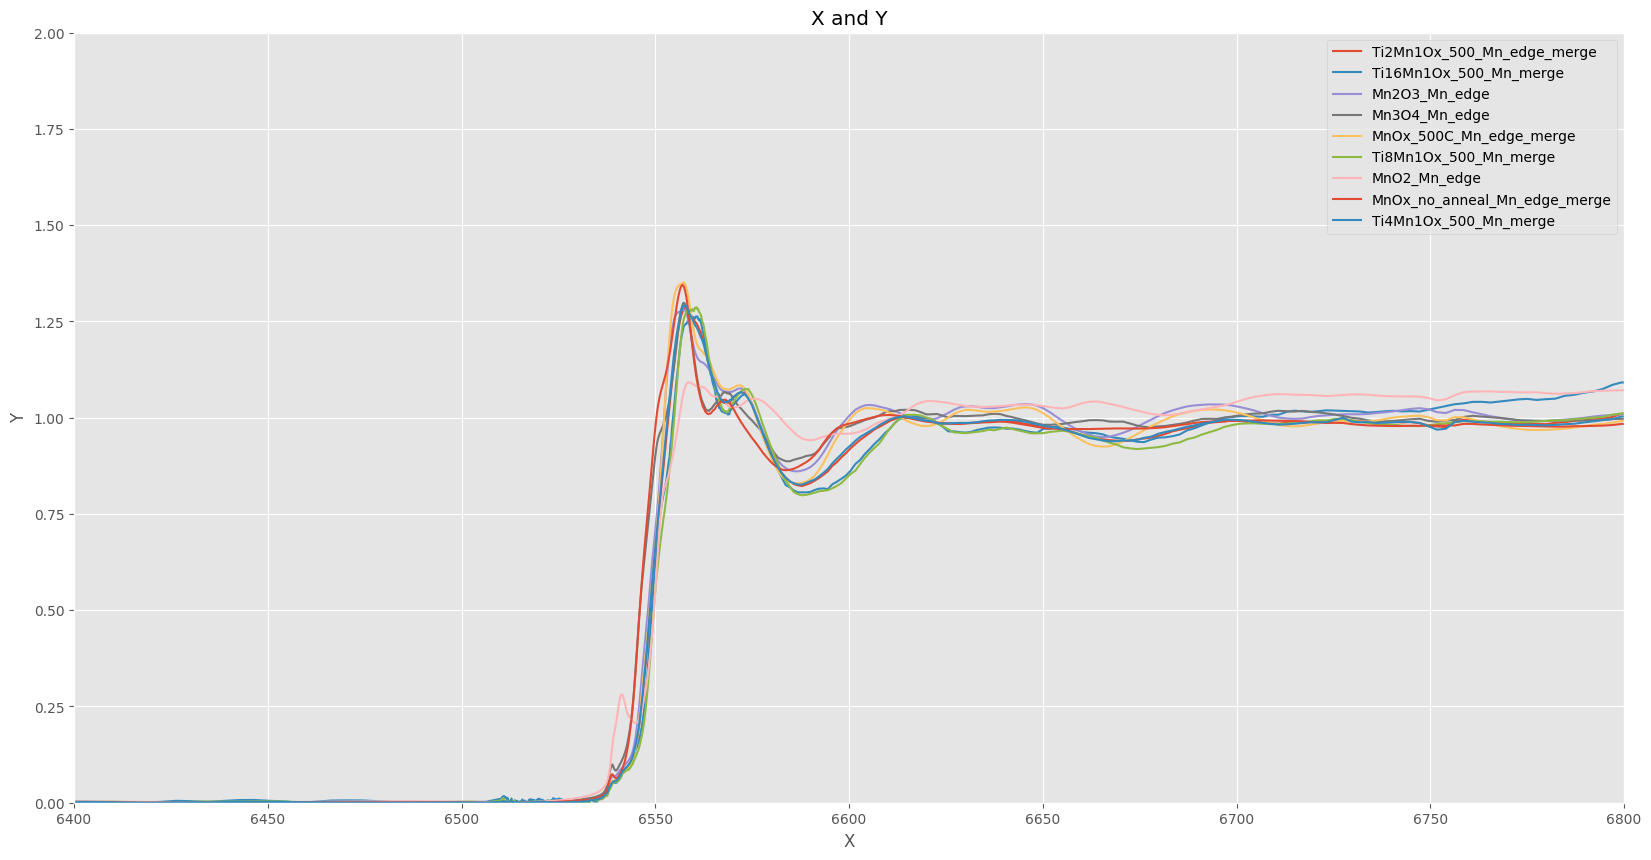

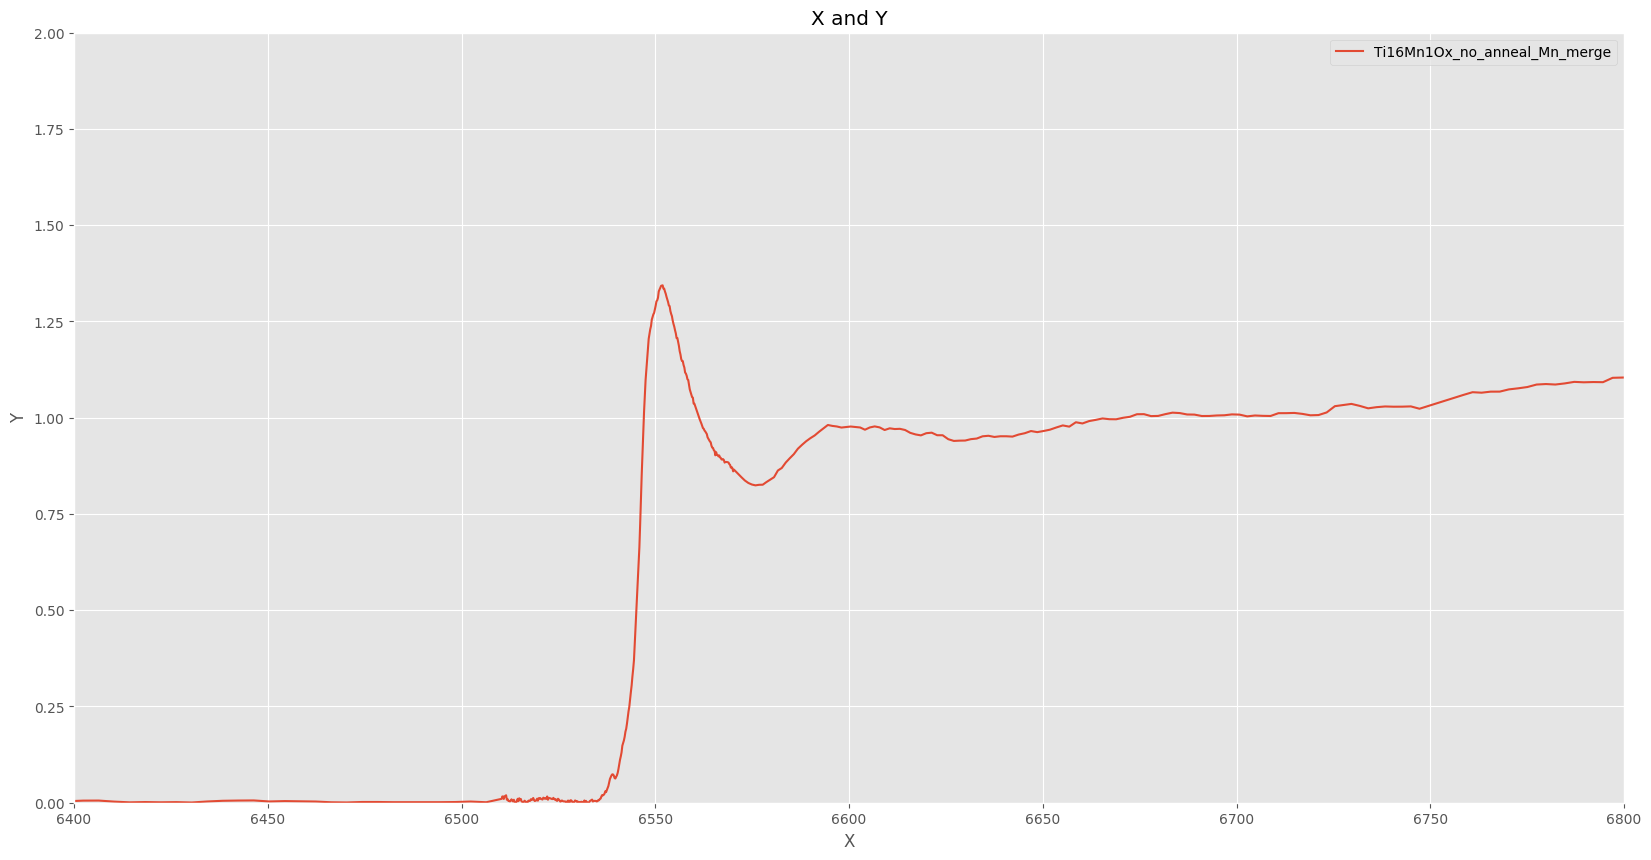

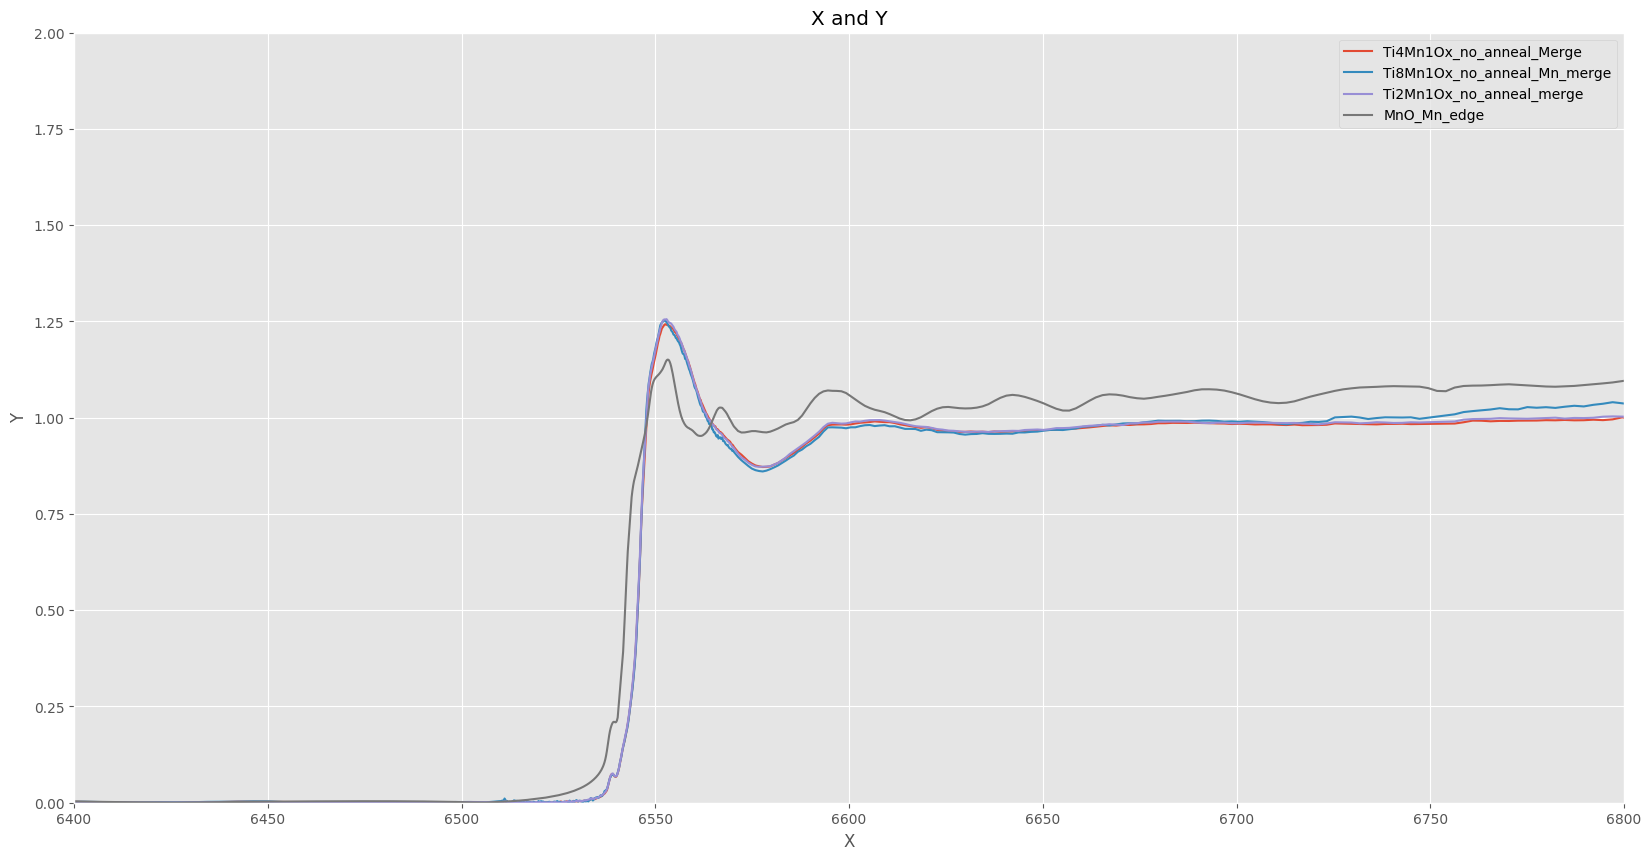

In [28]:
g = Graph()
g.cluster_graph(spectral_arr)

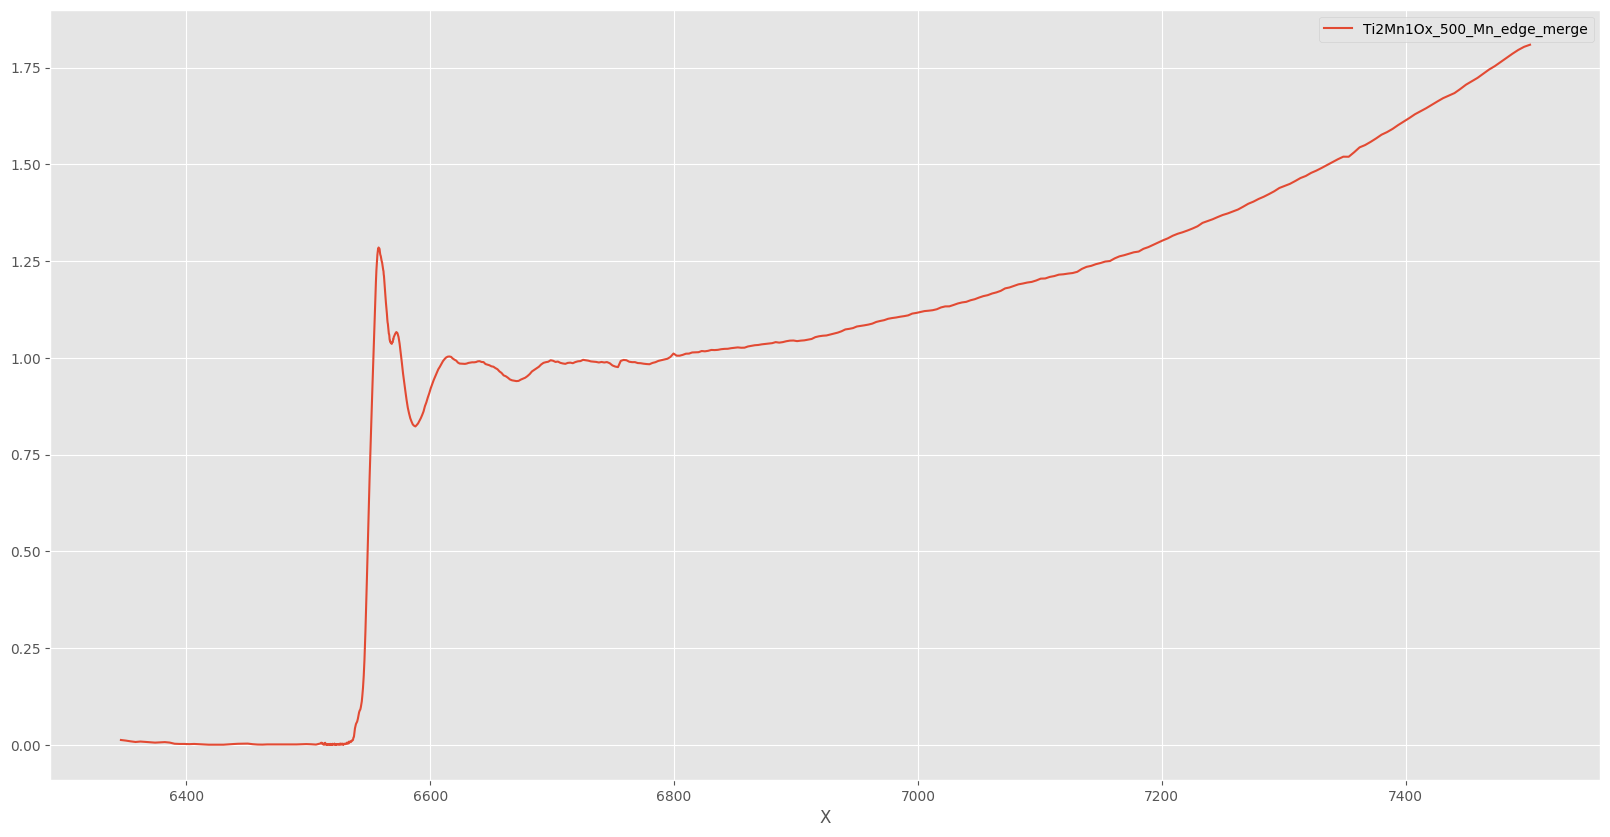

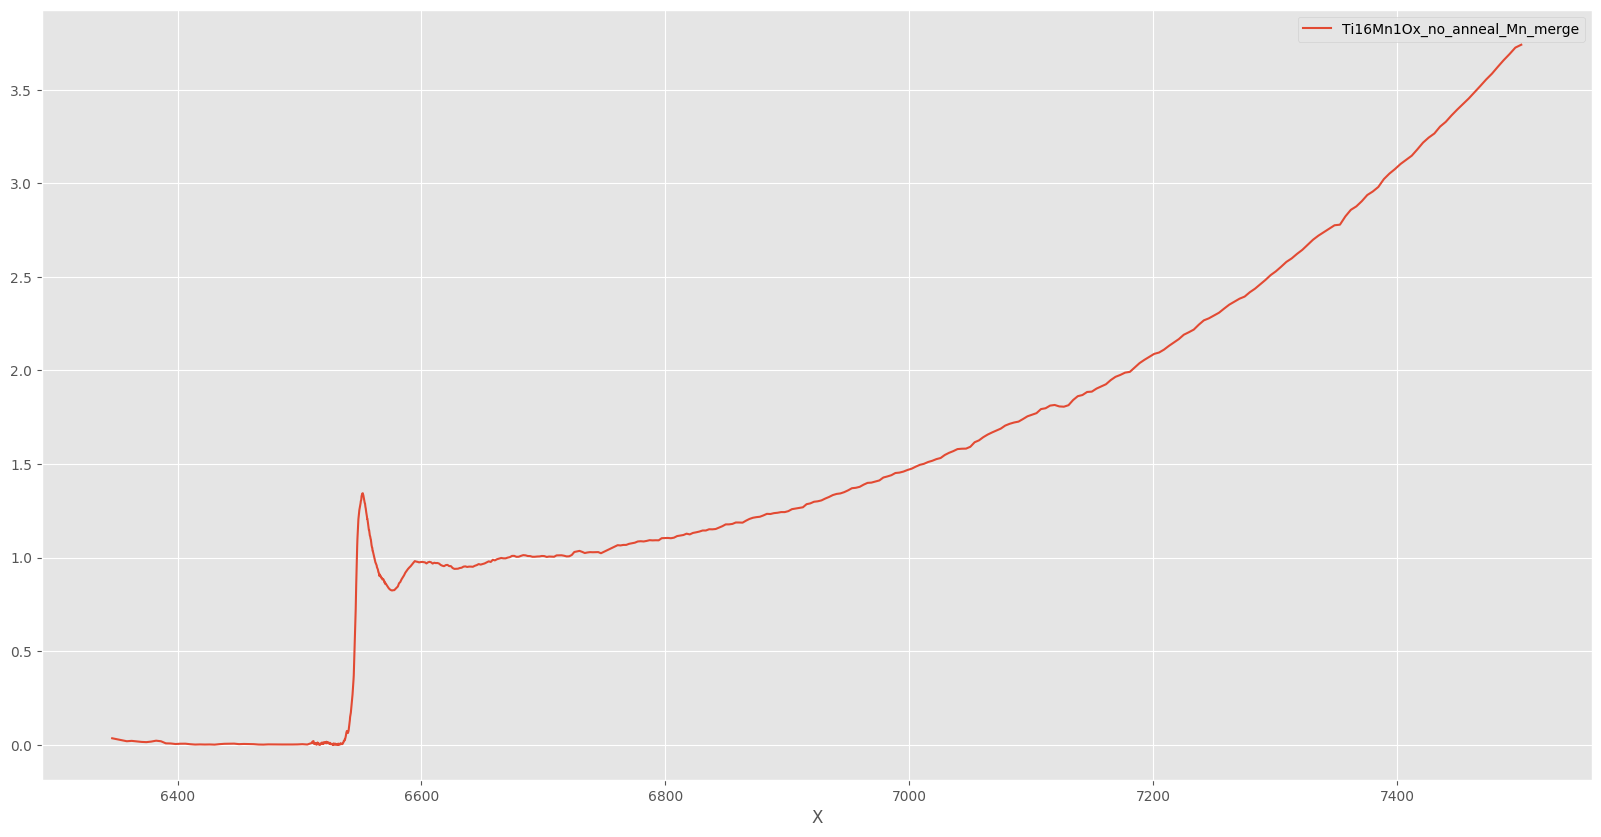

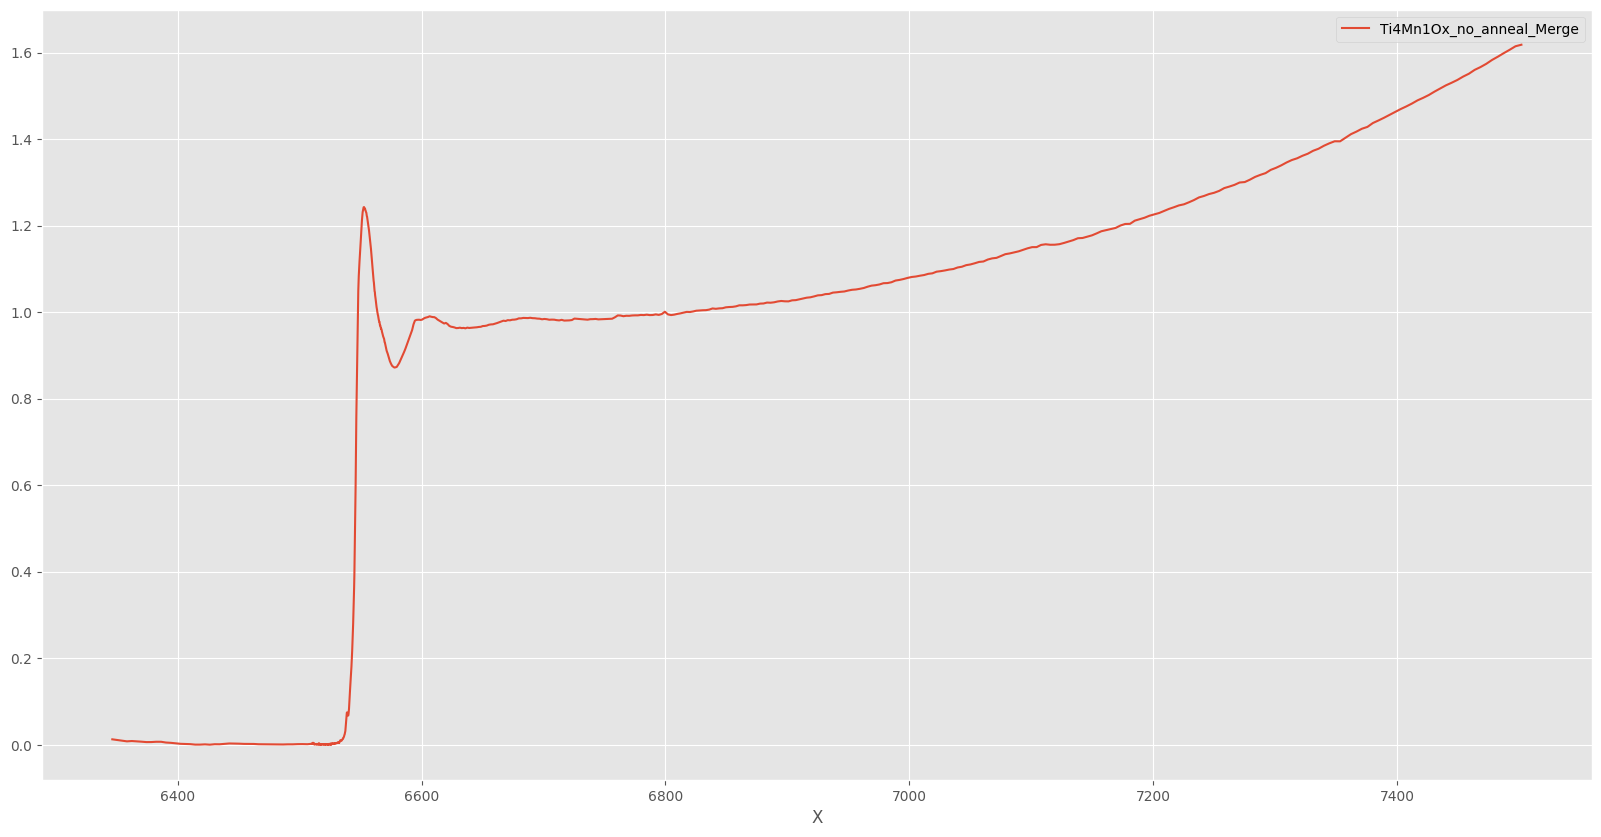

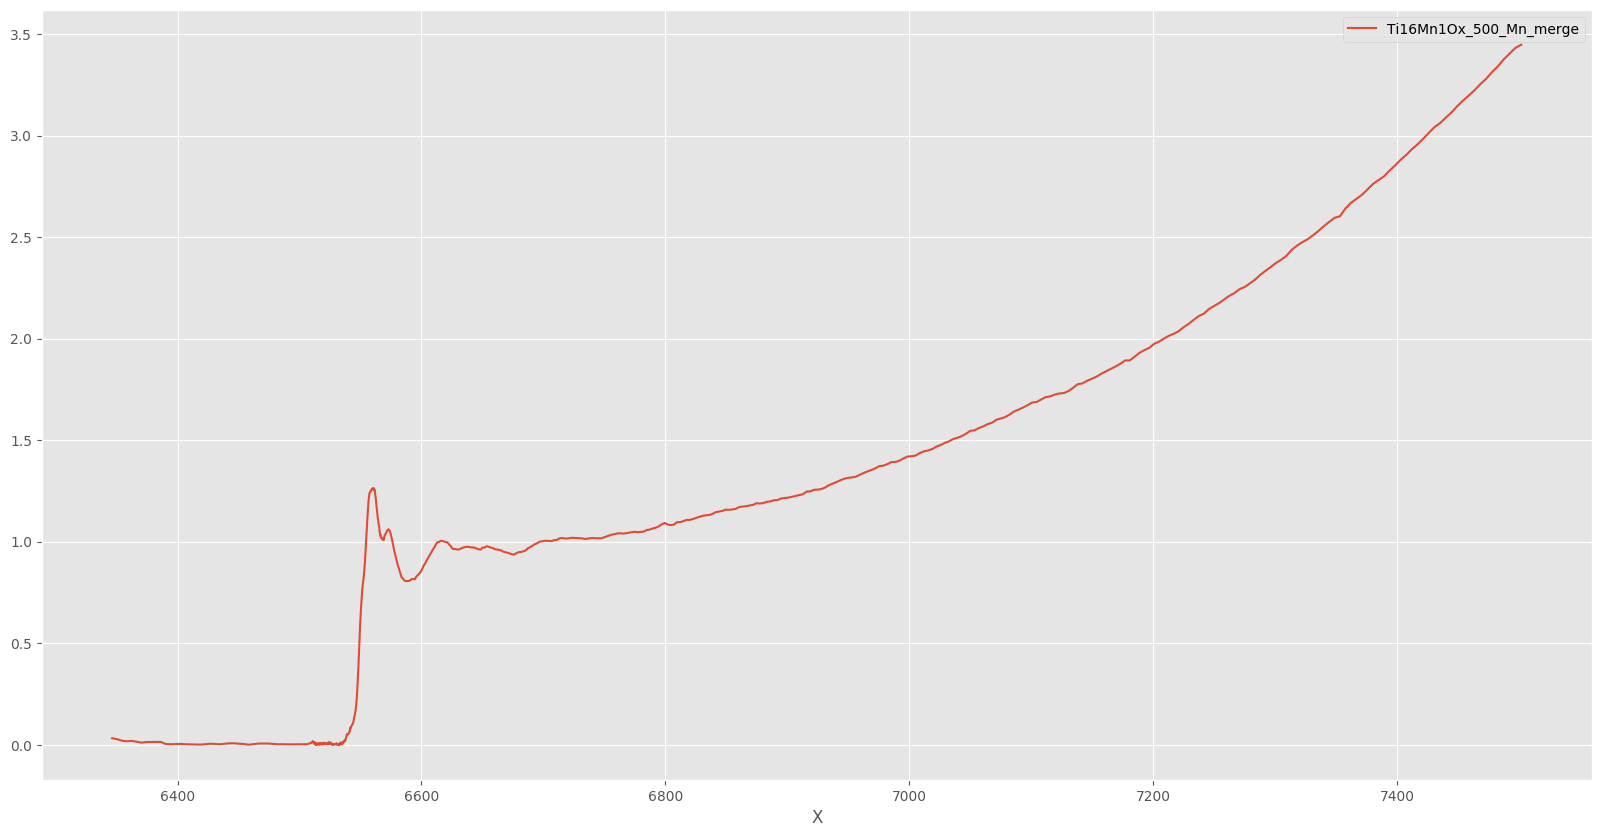

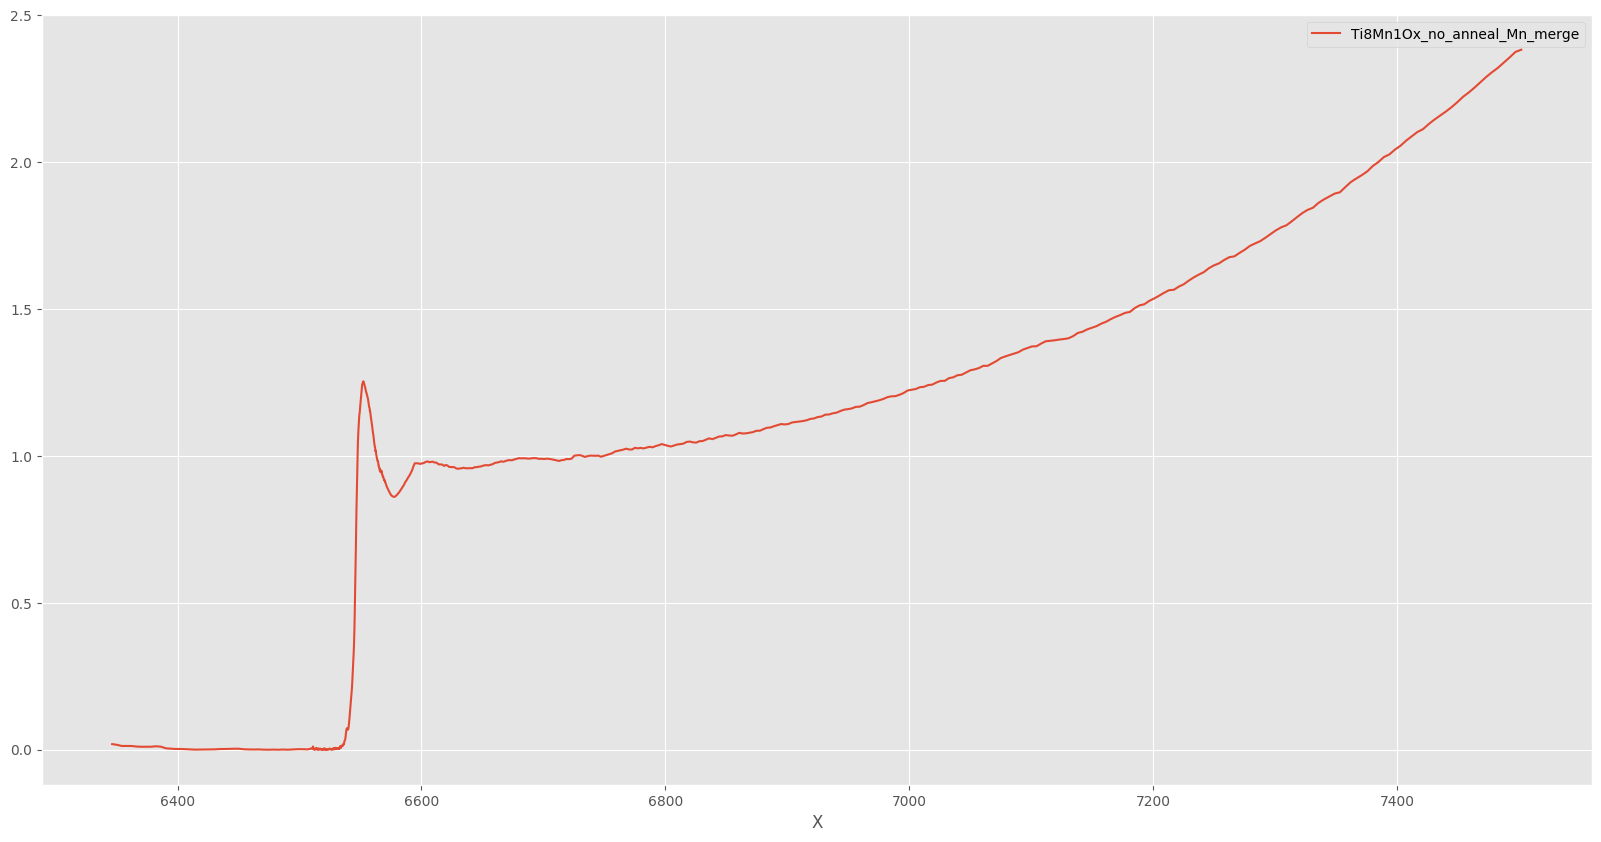

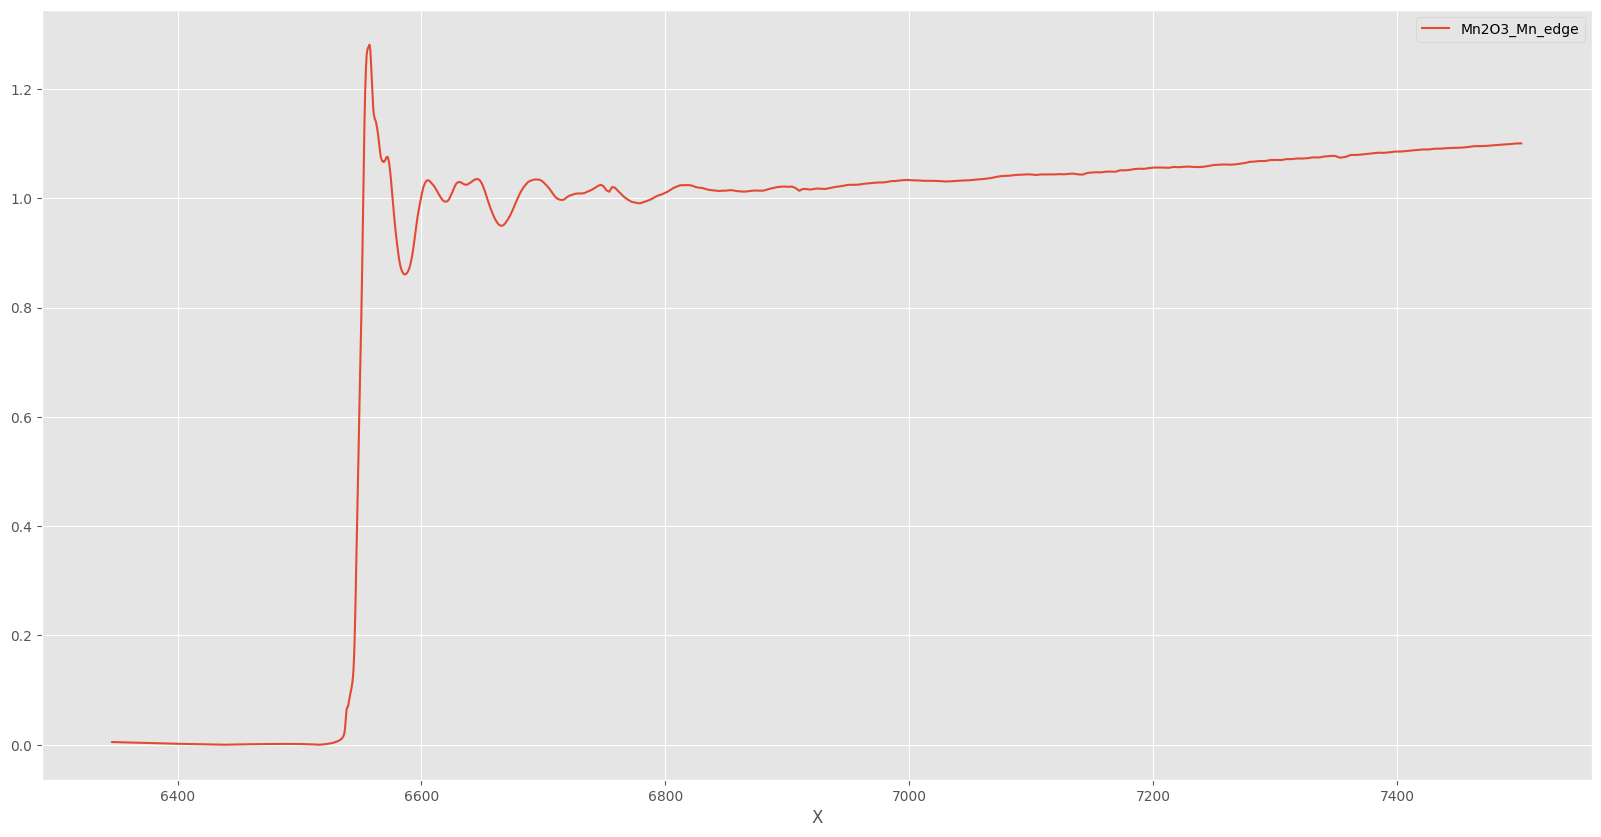

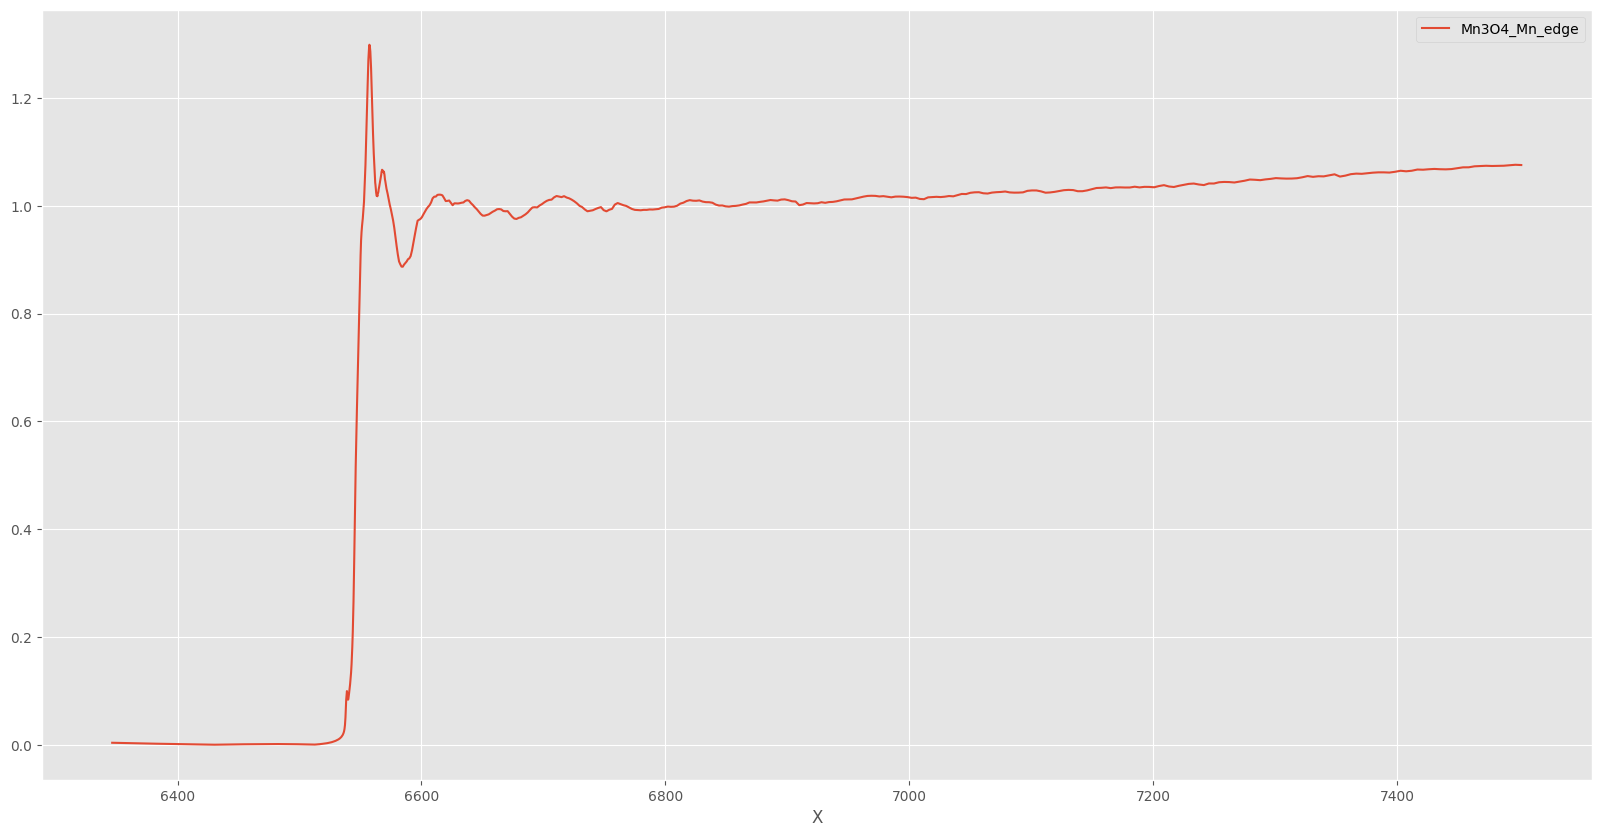

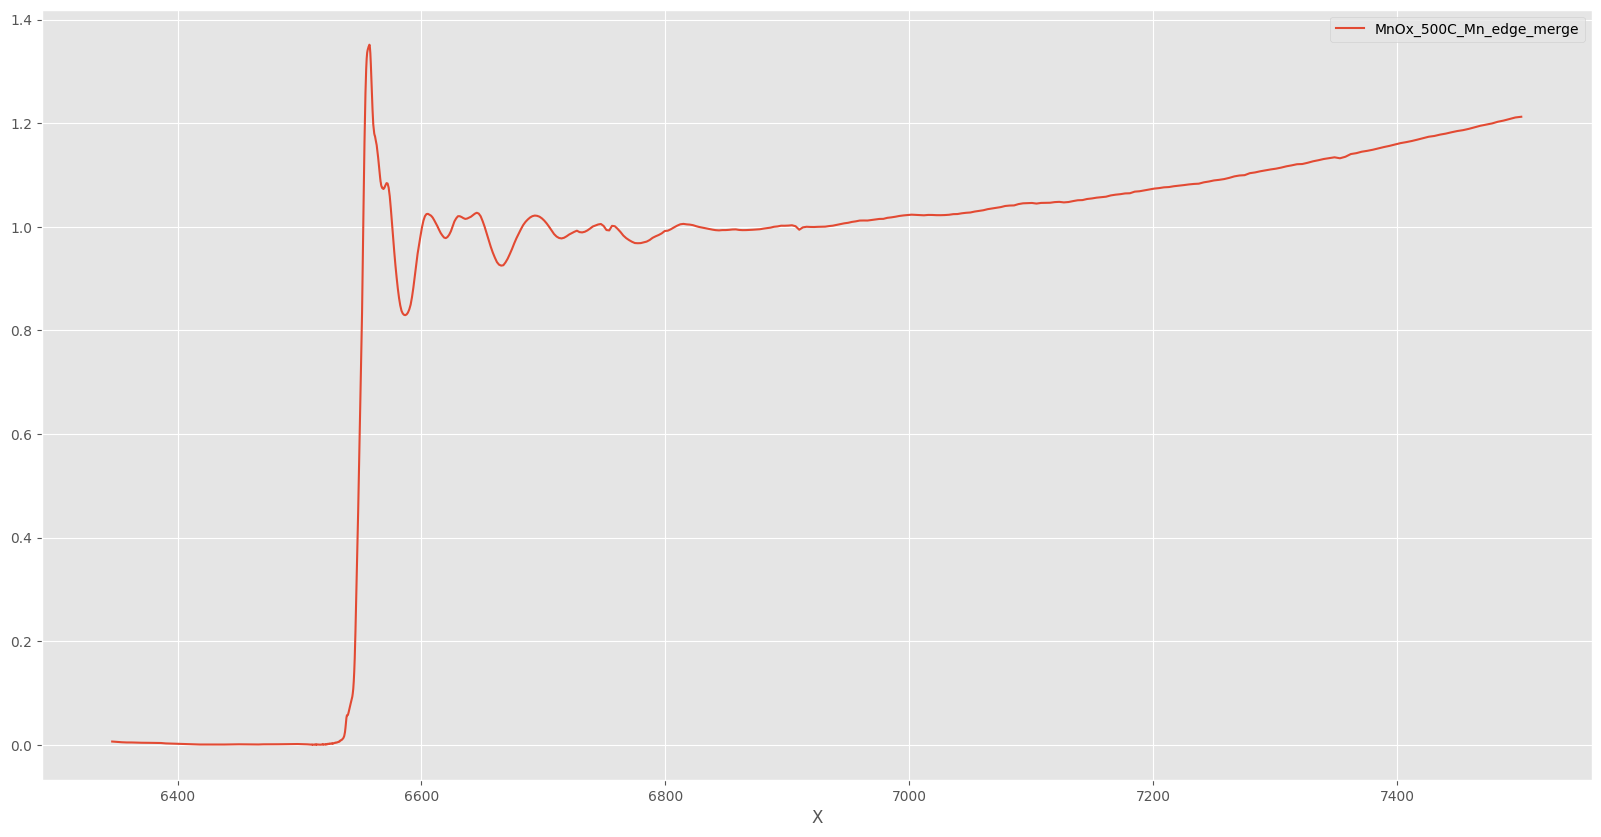

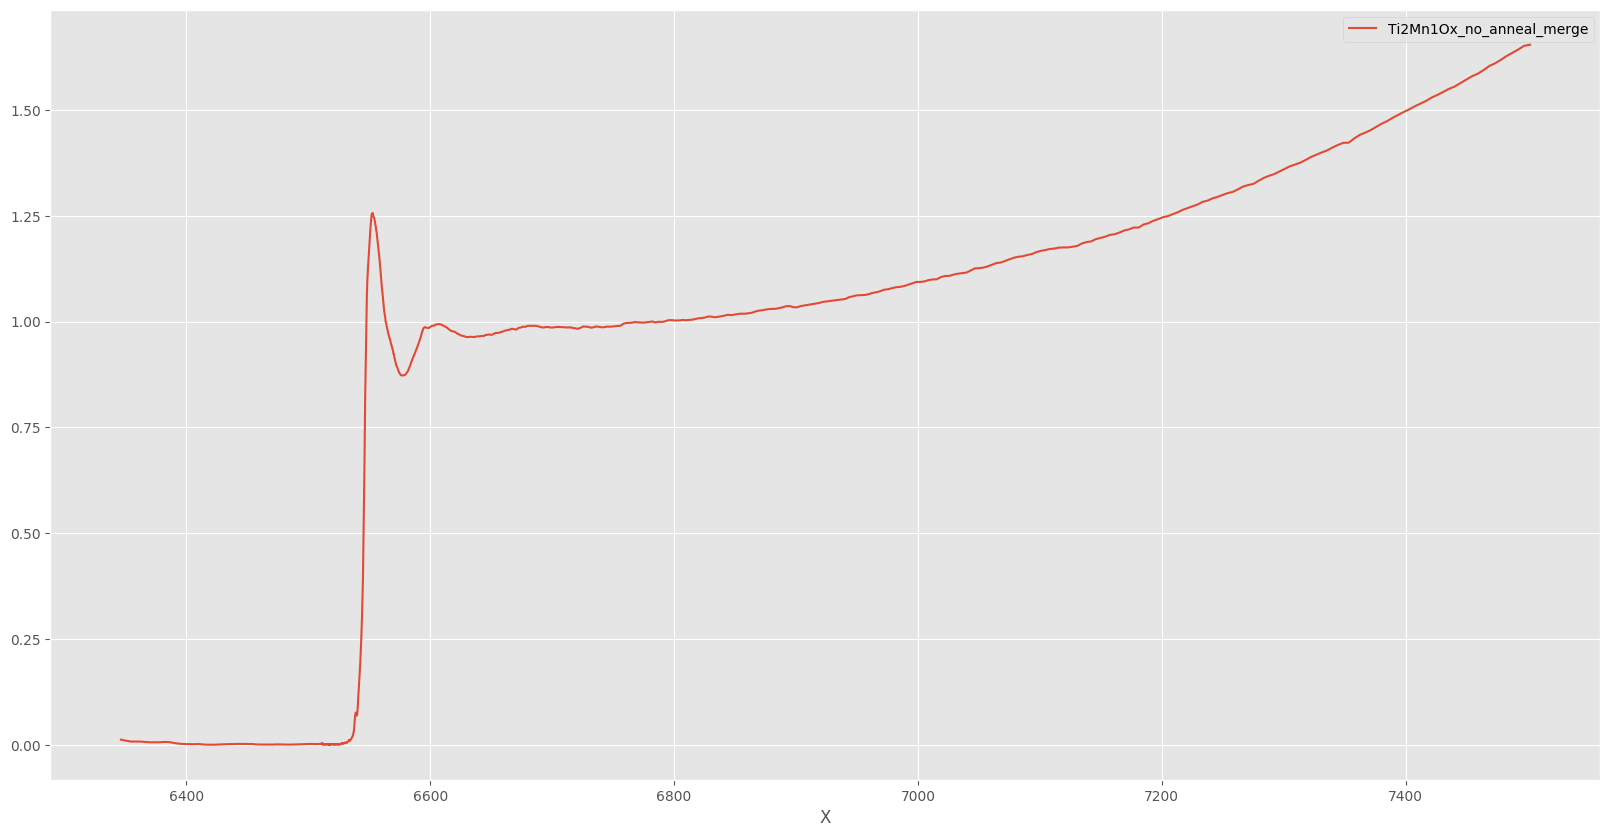

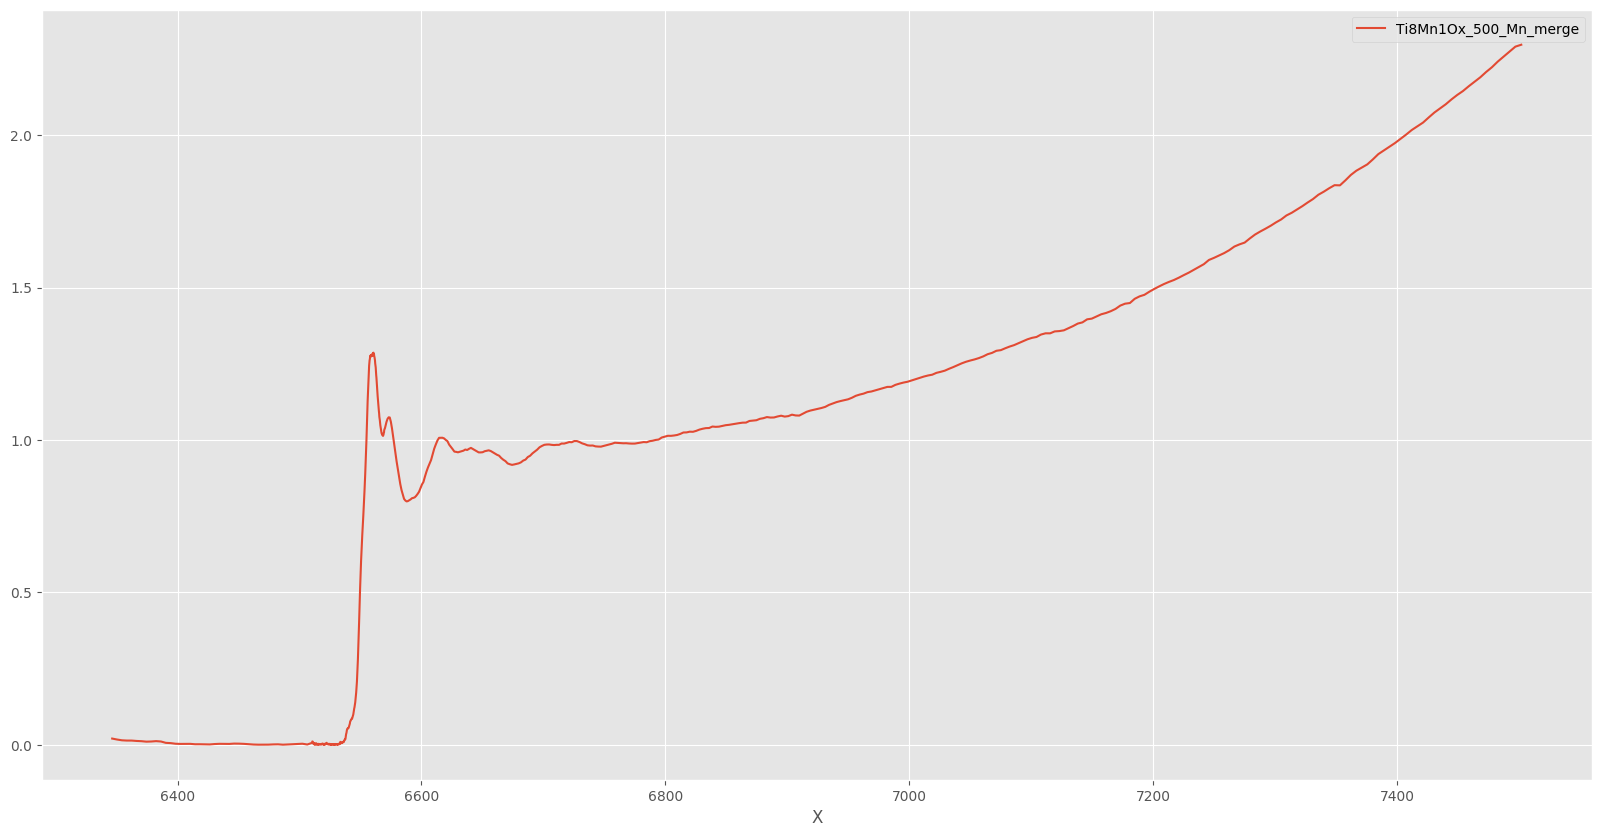

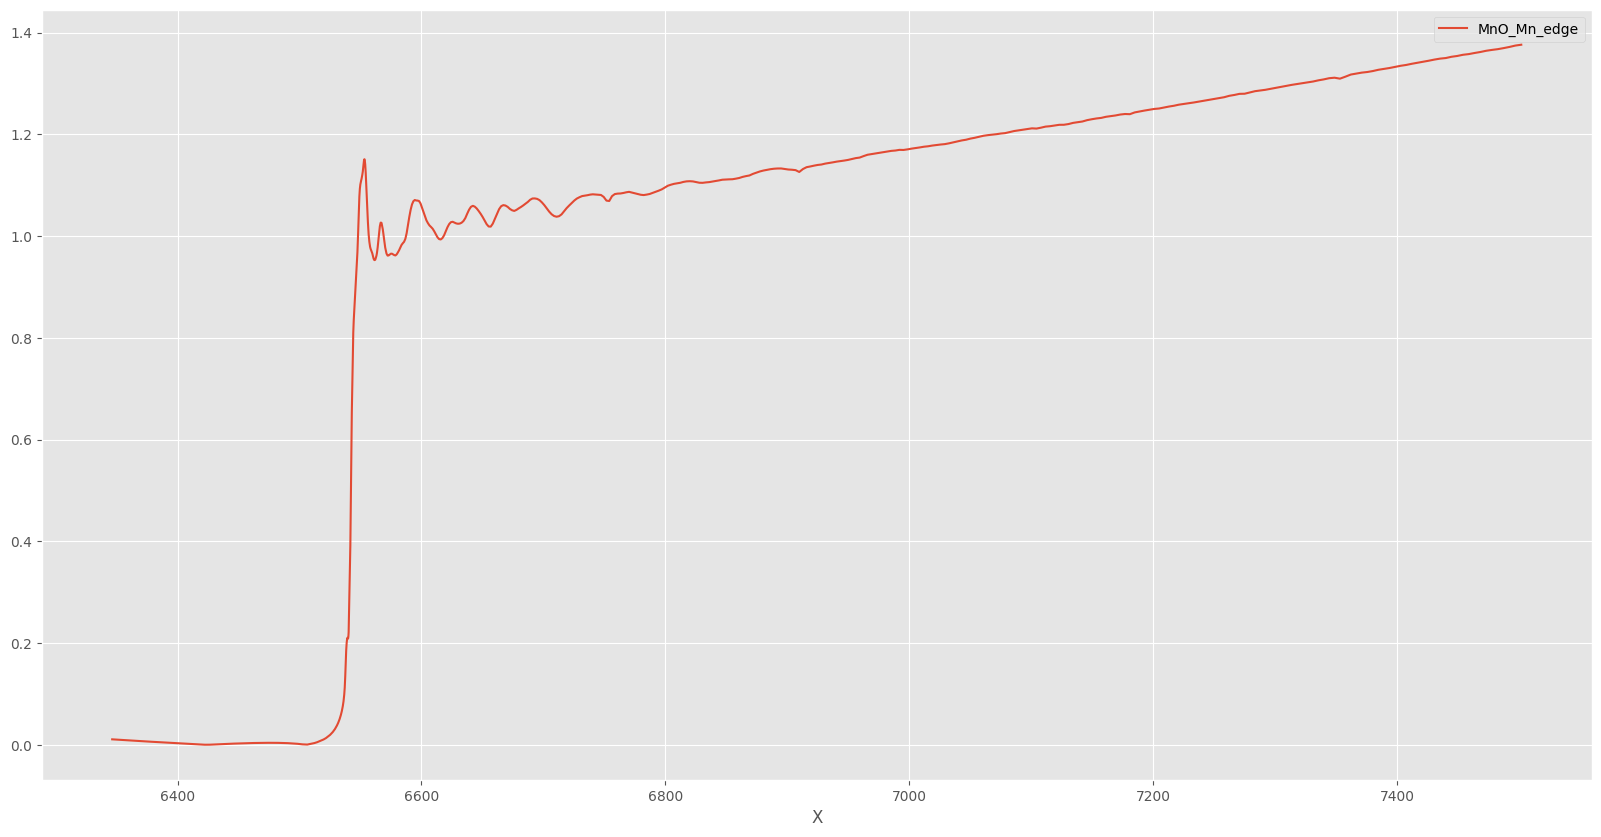

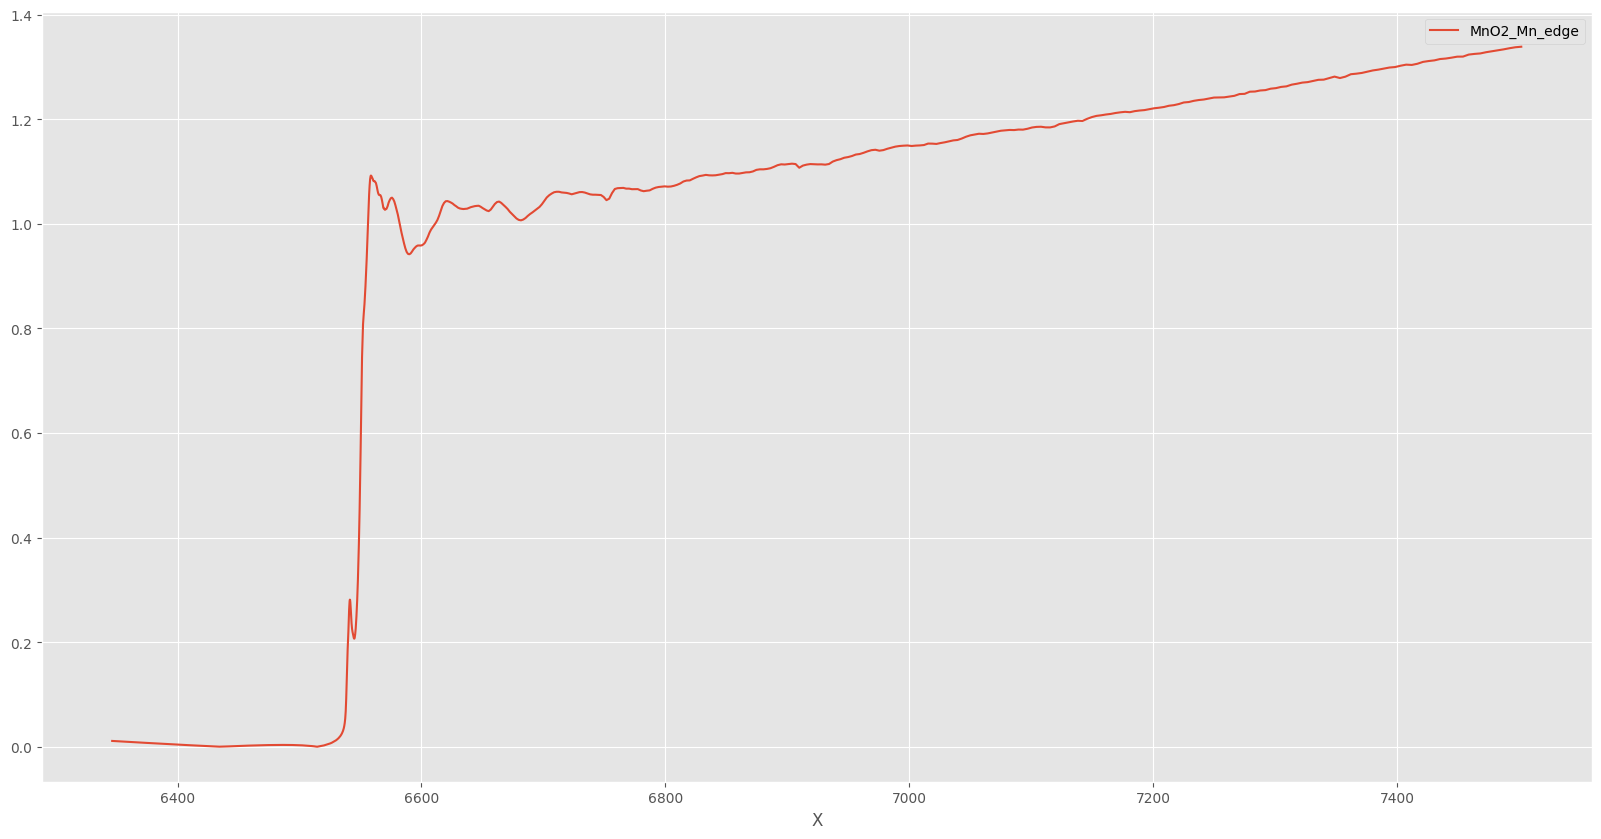

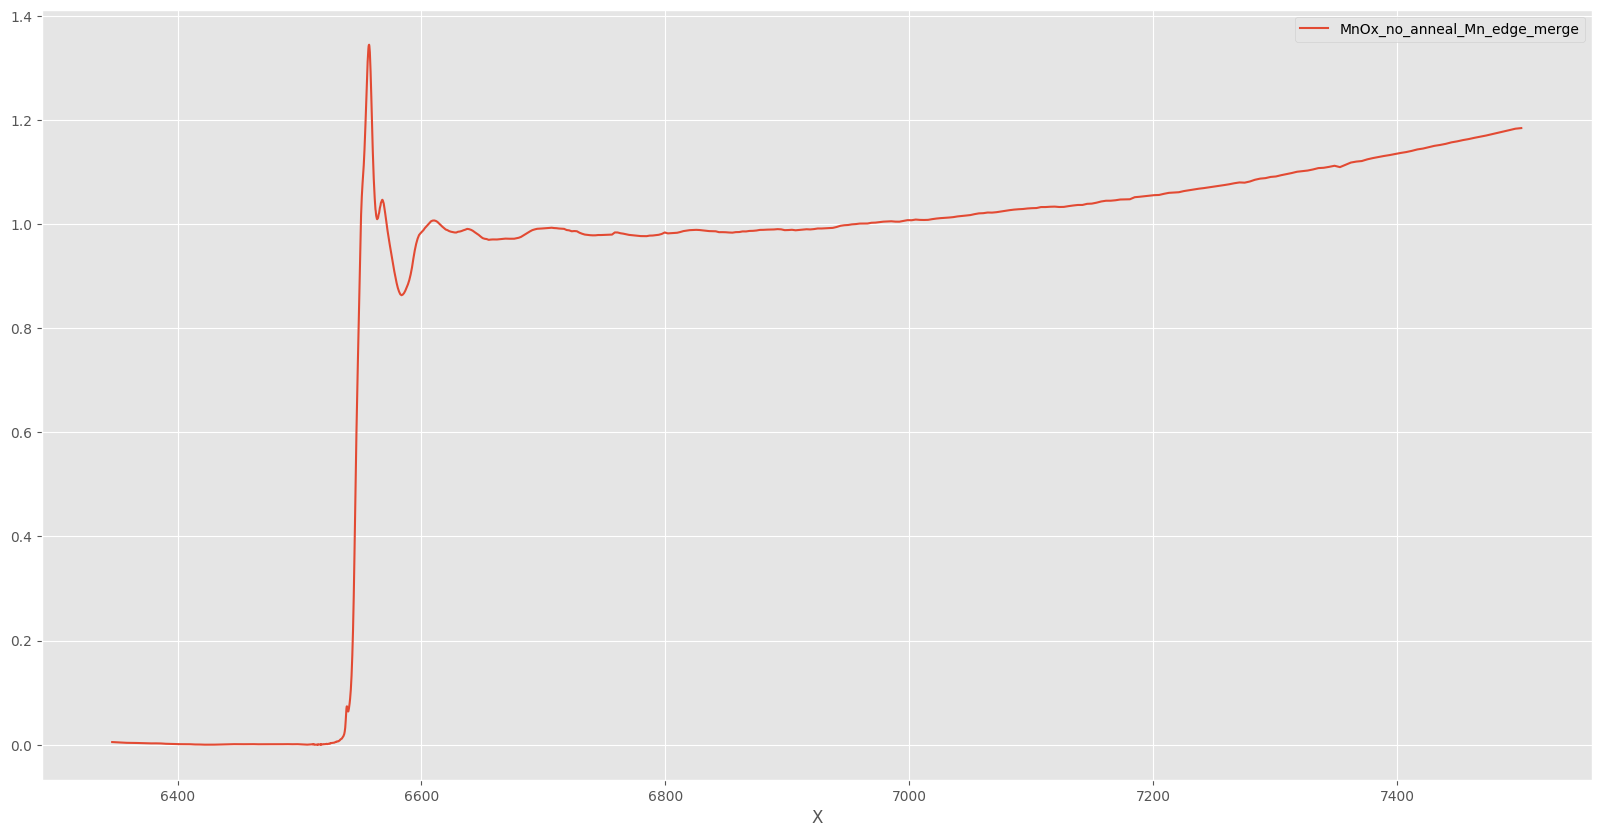

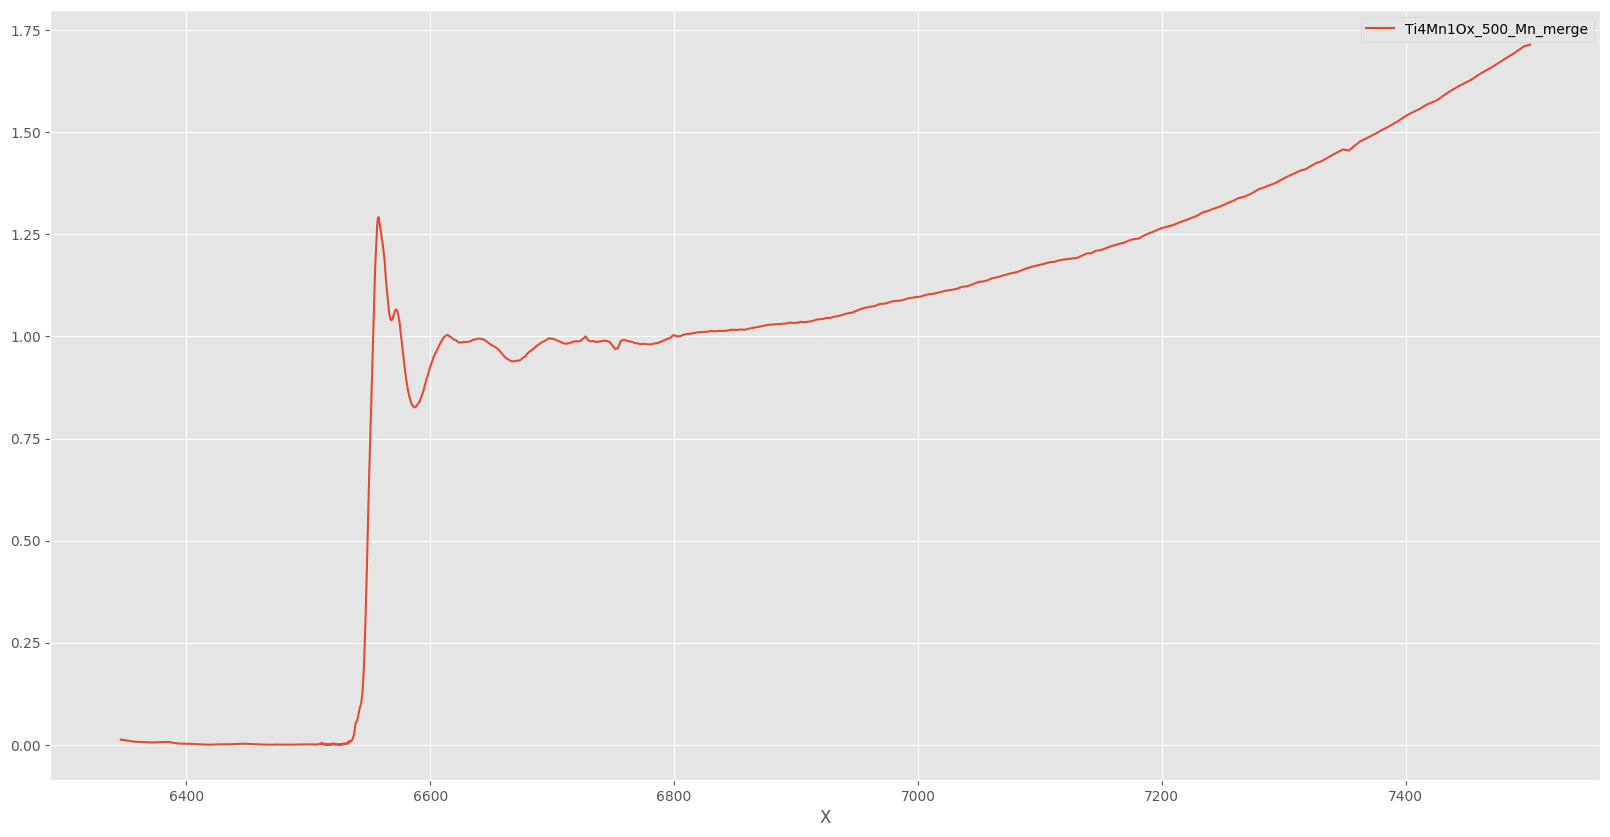

In [29]:
g = Graph()
g.each_graph()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Ad

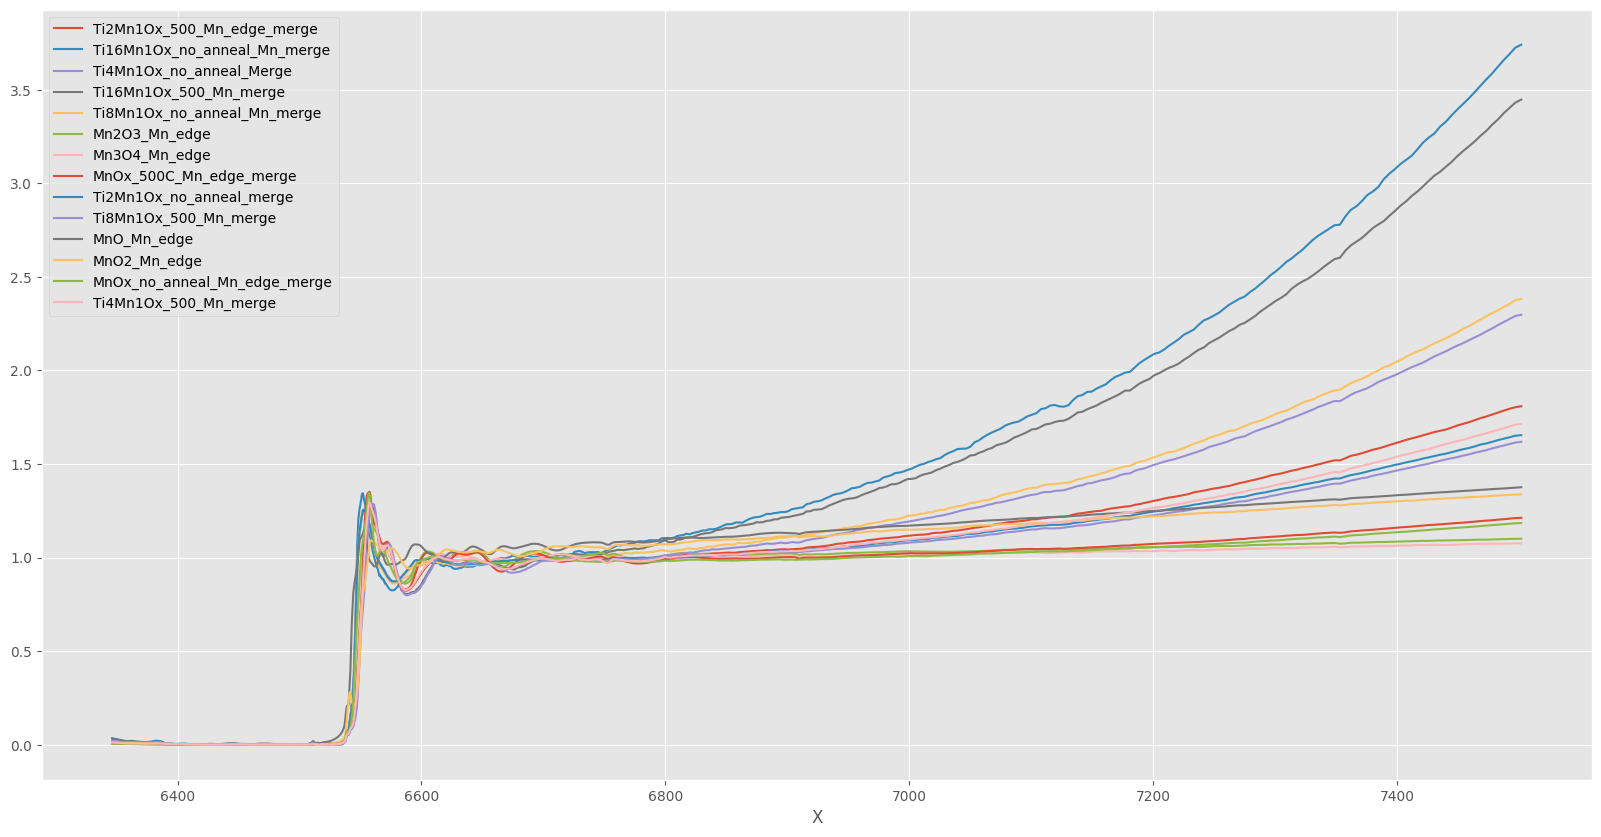

In [30]:
g = Graph()
g.all_graphs()